### Table of contents
[Predefined functions](#funcs)

[Parameters, filenames and directories](#params)

[Reading maps and catalogs](#read)

[Function for plotting statistics for different outlCoeff](#plotStatOutlCoeff)

[SpecZ outlier filtering](#specZ)

[PhotoZ_ML outlier filtering](#photoZ_ML)

[PhotoZ_SED outlier filtering](#photoZ_SED)

[ActivMap filtering](#activMap)

In [44]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from func_maps import readMaps
from func_stat import *
from func_visualizations import *
from os.path import join
from ast import literal_eval

### Parameters, filenames and directories
<a id='params'>#params</a>

In [45]:
### Files and directories ###
dirSOM=r'D:\Sources\COSMOS_photoZ\COSMOS_v3.0\SOM\forArticle'
#dirSOM=r'/mnt/Data/Work/Sources/COSMOS/CatalogsFromWorkingPC'
nameOfExperiment='ex020'
dirMaps=join(dirSOM,nameOfExperiment,'maps')
dirPlots=join(dirSOM,nameOfExperiment,'plots')
dirDatasets=join(dirSOM,nameOfExperiment,'datasets')
mapsAllKeys=['mapsTrainOnTrain','mapsTestOnTrain','mapsDeimosOnTrain']

In [98]:
datasetNames={'Train':r'05_COSMOS_SpectrZ_Zlim_1p2_SOMinfo_001.csv',
              'Test':r'05_COSMOS_SpectrZ_Zlim_1p2_Test_SOMinfo_001.csv',
              'Deimos':r'04_COSMOS_DEIMOS_QfFilter_SOMinfo_001.csv',
             'Total':r'05_COSMOS_SpectrZ_Zlim_1p2_SOMinfo_Total.csv'}

In [99]:
idCol='Seq'
specZ='specZ'
photoZ_ML='photoZ_ML'
photoZ_SED='photoZ_SED'
residML='resid_ML'
residSED='resid_SED'
residML_SED='residML_SED'

In [100]:
### Format for saving images ###
imSaveFormat='.png'
#imSaveFormat='.eps'

### Reading datasets
<a id='read'>#read</a>

In [109]:
datasets={}
cellIDs=['cellID_TrainSOM']
for key,val in datasetNames.items():
    datasets[key]=pd.read_csv(join(dirDatasets,val))
    for cellID in cellIDs:
        datasets[key][cellID]=[literal_eval(x) for x in datasets[key][cellID]]

### Calculating statistics
<a id='statDeclare'>#statDeclare</a>
<p>Since we have a bit too many statistical tables, they are stashed in one dictionary. It's structure is as follows:</p>
    <br>Dictionary statAll has keys which correspond to datasets.
    <br>For each key we have a dictionary which keys correspond to stat table names. We have: 
    <br>- 'basic' table, which corresponds to different cases of cleaning (None, SpecZ, PhotoZ, activMap and their combinations);
    <br>- 'magBin' table, which describes statistics within magnitude bins;
    <br>- 'oultCoeff' for specZ, SED and ML photoZ, which describe statistics within each bin of outlier coefficients;
    <br>- 'activMap' table, which describes statistics for different occupations of cells;
    <br>- probably something else.

In [110]:
statAll={name:{} for name in datasetNames.keys()}

In [111]:
### Calculate statistics for general cases: no filtering, specZ/photoZ/activMap filterings ###
for name in statAll.keys():
    residCols=[residML,residSED,residML_SED]
    colsFilt=[specZ+'_outlCoeff',photoZ_ML+'_outlCoeff',photoZ_SED+'_outlCoeff']
    if name=='Total':
        colsFilt=[c+'_Min' for c in colsFilt]

    statAll[name]['Basic']=createStatTab(residCols,indexName='case')
    
    data=datasets[name]
    statAll[name]['Basic']=allStatsAddRec(statAll[name]['Basic'],case='No filtering',data=data,
                                             residCols=residCols)
    data=datasets[name][datasets[name]['trainMapOccupation']>5]
    statAll[name]['Basic']=allStatsAddRec(statAll[name]['Basic'],case='trainMapOccupation>5',data=data,
                                             residCols=residCols)
    for col in colsFilt:
        data=datasets[name][datasets[name][col].abs()<=1]
        statAll[name]['Basic']=allStatsAddRec(statAll[name]['Basic'],case=col+'<=1',data=data,
                                             residCols=residCols)
        data=data[data['trainMapOccupation']>5]
        statAll[name]['Basic']=allStatsAddRec(statAll[name]['Basic'],case=col+' + occupation filters',data=data,
                                             residCols=residCols)
    

In [112]:
statAll['Total']['Basic']

resid_ML                 \
                                                   Std   NMAD    Mean   
case                                                                    
No filtering                                     0.047  0.018  -0.002   
trainMapOccupation>5                             0.047  0.018 -0.0021   
specZ_outlCoeff_Min<=1                           0.046  0.018 -0.0026   
specZ_outlCoeff_Min + occupation filters         0.046  0.018 -0.0026   
photoZ_ML_outlCoeff_Min<=1                       0.047  0.018  -0.002   
photoZ_ML_outlCoeff_Min + occupation filters     0.047  0.018  -0.002   
photoZ_SED_outlCoeff_Min<=1                      0.047  0.018 -0.0021   
photoZ_SED_outlCoeff_Min + occupation filters    0.047  0.018 -0.0021   

                                                        resid_SED         \
                                              % outl_15       Std   NMAD   
case                                                                       
No filtering                                        1.8     0.101  0.011   
trainMapOccupation>5                               1.75     0.096  0.011   
specZ_outlCoeff_Min<=1                             1.73     0.101  0.011   
specZ_outlCoeff_Min + occupation filters           1.69     0.095  0.011   
photoZ_ML_outlCoeff_Min<=1                         1.79     0.102  0.011   
photoZ_ML_outlCoeff_Min + occupation filters       1.75     0.096  0.011   
photoZ_SED_outlCoeff_Min<=1                        1.76     0.083  0.011   
photoZ_SED_outlCoeff_Min + occupation filters      1.71      0.08  0.011   

                                                                residML_SED  \
                                                 Mean % outl_15         Std   
case                                                                          
No filtering                                  -0.0059      2.56       0.048   
trainMapOccupation>5                          -0.0051      2.45       0.046   
specZ_outlCoeff_Min<=1                        -0.0064      2.48       0.048   
specZ_outlCoeff_Min + occupation filters      -0.0056      2.38       0.046   
photoZ_ML_outlCoeff_Min<=1                    -0.0059      2.56       0.048   
photoZ_ML_outlCoeff_Min + occupation filters  -0.0051      2.45       0.046   
photoZ_SED_outlCoeff_Min<=1                   -0.0038      2.39       0.042   
photoZ_SED_outlCoeff_Min + occupation filters -0.0033       2.3       0.041   

                                                                        \
                                                NMAD    Mean % outl_15   
case                                                                     
No filtering                                   0.018  0.0002      1.24   
trainMapOccupation>5                           0.018 -0.0001      1.15   
specZ_outlCoeff_Min<=1                         0.018  0.0002      1.23   
specZ_outlCoeff_Min + occupation filters       0.018 -0.0001      1.15   
photoZ_ML_outlCoeff_Min<=1                     0.018  0.0003      1.24   
photoZ_ML_outlCoeff_Min + occupation filters   0.018 -0.0001      1.16   
photoZ_SED_outlCoeff_Min<=1                    0.018 -0.0007      1.08   
photoZ_SED_outlCoeff_Min + occupation filters  0.018  -0.001      1.02   

                                                  General  
                                              Num objects  
case                                                       
No filtering                                      13922.0  
trainMapOccupation>5                              13701.0  
specZ_outlCoeff_Min<=1                            13853.0  
specZ_outlCoeff_Min + occupation filters          13633.0  
photoZ_ML_outlCoeff_Min<=1                        13885.0  
photoZ_ML_outlCoeff_Min + occupation filters      13664.0  
photoZ_SED_outlCoeff_Min<=1                       13863.0  
photoZ_SED_outlCoeff_Min + occupation filters     13645.0

In [108]:
statAll['Total']['Basic']

resid_ML                 \
                                                   Std   NMAD    Mean   
case                                                                    
No filtering                                     0.047  0.018  -0.002   
trainMapOccupation>5                             0.047  0.018 -0.0021   
specZ_outlCoeff_Min<=1                           0.027  0.017 -0.0001   
specZ_outlCoeff_Min + occupation filters         0.027  0.017 -0.0001   
photoZ_ML_outlCoeff_Min<=1                       0.047  0.018  -0.002   
photoZ_ML_outlCoeff_Min + occupation filters     0.047  0.018  -0.002   
photoZ_SED_outlCoeff_Min<=1                      0.046  0.018 -0.0021   
photoZ_SED_outlCoeff_Min + occupation filters    0.046  0.018 -0.0021   

                                                        resid_SED         \
                                              % outl_15       Std   NMAD   
case                                                                       
No filtering                                        1.8     0.101  0.011   
trainMapOccupation>5                               1.75     0.096  0.011   
specZ_outlCoeff_Min<=1                             0.32     0.079   0.01   
specZ_outlCoeff_Min + occupation filters            0.3     0.072   0.01   
photoZ_ML_outlCoeff_Min<=1                         1.77     0.092  0.011   
photoZ_ML_outlCoeff_Min + occupation filters       1.73     0.086  0.011   
photoZ_SED_outlCoeff_Min<=1                        1.71      0.07  0.011   
photoZ_SED_outlCoeff_Min + occupation filters      1.66     0.066  0.011   

                                                                residML_SED  \
                                                 Mean % outl_15         Std   
case                                                                          
No filtering                                  -0.0059      2.56       0.048   
trainMapOccupation>5                          -0.0051      2.45       0.046   
specZ_outlCoeff_Min<=1                        -0.0024      0.95       0.043   
specZ_outlCoeff_Min + occupation filters      -0.0016      0.87       0.041   
photoZ_ML_outlCoeff_Min<=1                    -0.0046      2.35       0.043   
photoZ_ML_outlCoeff_Min + occupation filters   -0.004      2.25       0.041   
photoZ_SED_outlCoeff_Min<=1                   -0.0036      2.04       0.034   
photoZ_SED_outlCoeff_Min + occupation filters -0.0032      1.93       0.032   

                                                                        \
                                                NMAD    Mean % outl_15   
case                                                                     
No filtering                                   0.018  0.0002      1.24   
trainMapOccupation>5                           0.018 -0.0001      1.15   
specZ_outlCoeff_Min<=1                         0.018 -0.0003      0.93   
specZ_outlCoeff_Min + occupation filters       0.018 -0.0006      0.85   
photoZ_ML_outlCoeff_Min<=1                     0.018 -0.0001      1.02   
photoZ_ML_outlCoeff_Min + occupation filters   0.018 -0.0004      0.95   
photoZ_SED_outlCoeff_Min<=1                    0.018       0      0.66   
photoZ_SED_outlCoeff_Min + occupation filters  0.018 -0.0002      0.58   

                                                  General  
                                              Num objects  
case                                                       
No filtering                                      13922.0  
trainMapOccupation>5                              13701.0  
specZ_outlCoeff_Min<=1                            12817.0  
specZ_outlCoeff_Min + occupation filters          12616.0  
photoZ_ML_outlCoeff_Min<=1                        12916.0  
photoZ_ML_outlCoeff_Min + occupation filters      12716.0  
photoZ_SED_outlCoeff_Min<=1                       12946.0  
photoZ_SED_outlCoeff_Min + occupation filters     12744.0

In [106]:
statAll['Train']['Basic']

resid_ML                           \
                                               Std   NMAD    Mean % outl_15   
case                                                                          
No filtering                                 0.047  0.018  -0.002       1.8   
trainMapOccupation>5                         0.047  0.018 -0.0021      1.75   
specZ_outlCoeff<=1                           0.024  0.016       0      0.21   
specZ_outlCoeff + occupation filters         0.024  0.016  0.0001       0.2   
photoZ_ML_outlCoeff<=1                       0.047  0.018 -0.0018       1.6   
photoZ_ML_outlCoeff + occupation filters     0.047  0.018 -0.0017      1.57   
photoZ_SED_outlCoeff<=1                      0.045  0.017 -0.0021      1.61   
photoZ_SED_outlCoeff + occupation filters    0.045  0.017 -0.0021      1.56   

                                          resid_SED                           \
                                                Std   NMAD    Mean % outl_15   
case                                                                           
No filtering                                  0.101  0.011 -0.0059      2.56   
trainMapOccupation>5                          0.096  0.011 -0.0051      2.45   
specZ_outlCoeff<=1                            0.072   0.01 -0.0013      0.73   
specZ_outlCoeff + occupation filters          0.063   0.01 -0.0005      0.65   
photoZ_ML_outlCoeff<=1                        0.083  0.011 -0.0033       2.1   
photoZ_ML_outlCoeff + occupation filters      0.076  0.011 -0.0025         2   
photoZ_SED_outlCoeff<=1                       0.065   0.01  -0.003      1.81   
photoZ_SED_outlCoeff + occupation filters     0.061   0.01 -0.0026      1.71   

                                          residML_SED                 \
                                                  Std   NMAD    Mean   
case                                                                   
No filtering                                    0.048  0.018  0.0002   
trainMapOccupation>5                            0.046  0.018 -0.0001   
specZ_outlCoeff<=1                               0.04  0.017 -0.0008   
specZ_outlCoeff + occupation filters            0.038  0.017 -0.0011   
photoZ_ML_outlCoeff<=1                          0.039  0.018 -0.0007   
photoZ_ML_outlCoeff + occupation filters        0.036  0.018 -0.0009   
photoZ_SED_outlCoeff<=1                          0.03  0.017 -0.0003   
photoZ_SED_outlCoeff + occupation filters       0.028  0.017 -0.0005   

                                                        General  
                                          % outl_15 Num objects  
case                                                             
No filtering                                   1.24     13922.0  
trainMapOccupation>5                           1.15     13701.0  
specZ_outlCoeff<=1                             0.79     10376.0  
specZ_outlCoeff + occupation filters           0.71     10240.0  
photoZ_ML_outlCoeff<=1                         0.74      9630.0  
photoZ_ML_outlCoeff + occupation filters       0.66      9503.0  
photoZ_SED_outlCoeff<=1                        0.39      9895.0  
photoZ_SED_outlCoeff + occupation filters      0.33      9766.0

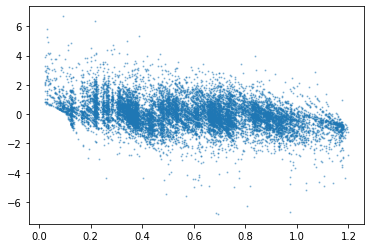

In [128]:
data=datasets['Train']
plt.scatter(data['specZ'],data['specZ_outlCoeff'],s=1,alpha=0.4)
#plt.ylim(-1,1)

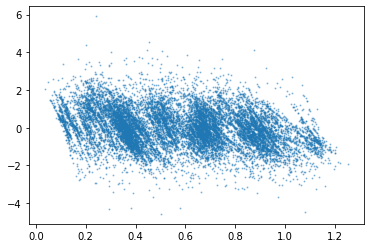

In [129]:
data=datasets['Train']
plt.scatter(data['photoZ_ML'],data['photoZ_ML_outlCoeff'],s=1,alpha=0.4)
#plt.ylim(-1,1)

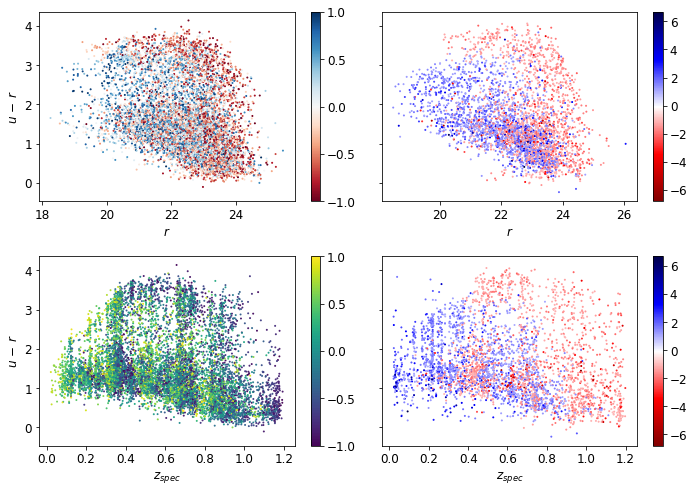

In [180]:
fig,axs=plt.subplots(2,2,figsize=(10,7),sharey='row')
plt.rcParams.update({'font.size': 12})
name='Train'
ax=axs[0][0]
data=datasets[name]
data=data[data['specZ_outlCoeff'].abs()<=1]
cb=ax.scatter(data['rmagap3'],data['umagap3']-data['rmagap3'],c=data['specZ_outlCoeff'],cmap='RdBu',s=1,alpha=1)
plt.colorbar(cb,ax=ax)
ax.set_xlabel('$r$')
ax.set_ylabel('$u\,-\,r$')
ax=axs[0][1]
data=datasets[name]
data=data[data['specZ_outlCoeff'].abs()>1]
cb=ax.scatter(data['rmagap3'],data['umagap3']-data['rmagap3'],c=data['specZ_outlCoeff'],cmap='seismic_r',s=1,alpha=1)
plt.colorbar(cb,ax=ax)
ax.set_xlabel('$r$')

ax=axs[1][0]
data=datasets[name]
data=data[data['specZ_outlCoeff'].abs()<=1]
cb=ax.scatter(data['specZ'],data['umagap3']-data['rmagap3'],c=data['specZ_outlCoeff'],s=1,alpha=0.9)
plt.colorbar(cb,ax=ax)
ax.set_xlabel('$z_{spec}$')
ax.set_ylabel('$u\,-\,r$')
ax=axs[1][1]
data=datasets[name]
data=data[data['specZ_outlCoeff'].abs()>1]
cb=ax.scatter(data['specZ'],data['umagap3']-data['rmagap3'],c=data['specZ_outlCoeff'],cmap='seismic_r',s=1,alpha=1)
plt.colorbar(cb,ax=ax)
ax.set_xlabel('$z_{spec}$')

plt.tight_layout()

2404


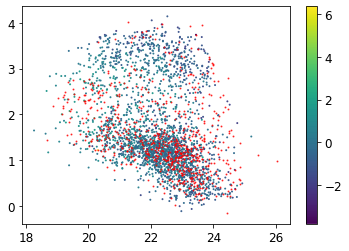

In [182]:
data=datasets['Train']
data=data[data['resid_SED'].abs()<0.002]
print(len(data))
cb=plt.scatter(data['rmagap3'],data['umagap3']-data['rmagap3'],c=data['specZ_outlCoeff'],s=1,alpha=0.9)
data=datasets['Train']
data=data[data['specZ_outlCoeff'].abs()>2]
plt.scatter(data['rmagap3'],data['umagap3']-data['rmagap3'],c='red',s=1,alpha=0.7)
plt.colorbar(cb)

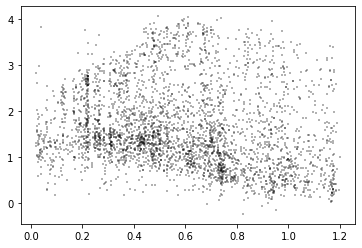

In [156]:
data=datasets['Train']
data=data[data['specZ_outlCoeff'].abs()<1]
#cb=plt.scatter(data['specZ'],data['umagap3']-data['rmagap3'],c=data['specZ_outlCoeff'],s=1,alpha=0.9)
data=datasets['Train']
data=data[data['specZ_outlCoeff'].abs()>1]
plt.scatter(data['specZ'],data['umagap3']-data['rmagap3'],c='black',s=2,alpha=0.3,marker='+')
#plt.colorbar(cb)

In [59]:
for name in statAll.keys():
    colsFilt=[photoZ_ML+'_outlCoeff',photoZ_SED+'_outlCoeff']
    if name=='Total':
        colsFilt=[c+'_Min' for c in colsFilt]
    residCols=[residML,residSED,residML_SED]

    for col in colsFilt:
        if name=='Run':
            continue
        data=datasets[name][datasets[name][col].abs()<=1]
        if name=='Total':
            data=data[data[specZ+'_outlCoeff_Min'].abs()<=1]
        else:
            data=data[data[specZ+'_outlCoeff'].abs()<=1]
        statAll[name]['Basic']=allStatsAddRec(statAll[name]['Basic'],case=col+'<=1, '+'specZ_outlCoeff<=1',data=data,
                                             residCols=residCols)
        data=data[data['trainMapOccupation']>5]
        statAll[name]['Basic']=allStatsAddRec(statAll[name]['Basic'],case=col+'+ specZ + occupation filters',data=data,
                                             residCols=residCols)

In [60]:
### Calculate statistics for objects with different outlCoeff ###
cases=[specZ,photoZ_ML,photoZ_SED]
residCols=[residML,residSED,residML_SED]
bins=np.arange(-5, 5.5,step=0.5)
for name in statAll.keys():
    for c in cases:
        if name=='Total':
            statAll[name]['outlCoeff_'+c]=statByBins(datasets[name],binCol=c+'_outlCoeff_Min',residCols=residCols,bins=bins)
        else:
            statAll[name]['outlCoeff_'+c]=statByBins(datasets[name],binCol=c+'_outlCoeff',residCols=residCols,bins=bins)

In [111]:
### Calculate statistics by spec-z bins for different cleaning cases###
numBins=7
bins=np.linspace(0, 1.2, numBins)
for name in statAll.keys():
    if name!='Run':
        residCols=[residML,residSED,residML_SED]
        statAll[name]['specZBins']=statByBins(datasets[name],binCol='specZ',residCols=residCols,bins=bins)
        
        data=datasets[name][datasets[name][specZ+'_outlCoeff'].abs()<=1]
        statAll[name]['specZBins_specZ_filt']=statByBins(data,binCol='specZ',residCols=residCols,bins=bins)

        data=datasets[name][datasets[name]['trainMapOccupation']>5]
        statAll[name]['specZBins_activMap']=statByBins(data,binCol='specZ',residCols=residCols,bins=bins)

        data=datasets[name][datasets[name][specZ+'_outlCoeff'].abs()<=1]
        data=data[data['trainMapOccupation']>5]
        statAll[name]['specZBins_activMap_specZ']=statByBins(data,binCol='specZ',residCols=residCols,bins=bins)

### Function for plotting statistics for different outlCoeff
<a id='plotStatOutlCoeff'>#plotStatOutlCoeff</a>

In [61]:
def plotStatsForOutlCoeff(data,case,stats,datasetNames,lims=(-3,3)):
    fig,axs=plt.subplots(6,len(data),figsize=(7*len(data),15),sharey='row',sharex='col')
    if len(data)==1:
        axs=[[ax] for ax in axs]
    estimators=['Std','NMAD','Mean','% outl_15']
    c=case
    i=0
    for j,d in enumerate(data):
        axs[i][j].set_xlim(lims)
        try:
            axs[i][j].scatter(d[c+'_outlCoeff'],d[residML],s=5,label='ML')
            axs[i][j].scatter(d[c+'_outlCoeff'],d[residSED],s=5,label='SED',alpha=0.7)
        except:
            axs[i][j].scatter(d[c+'_outlCoeff_Min'],d[residML],s=5,label='ML')
            axs[i][j].scatter(d[c+'_outlCoeff_Min'],d[residSED],s=5,label='SED',alpha=0.7)
        axs[i][j].grid(axis='x',linestyle ='--')
        axs[i][j].legend()
        axs[i][0].set_ylabel('resid')

    i=1
    for j,s in enumerate(stats):
        axs[i][j].set_xlim(lims)
        axs[i][j].plot(s['outlCoeff_'+c]['General']['binEdge'],s['outlCoeff_'+c]['General']['Num objects'],
                       markersize=10,label='Number of objects',marker='o')
        axs[i][j].grid(axis='x',linestyle ='--')
        axs[i][j].grid(axis='y',linestyle ='--')
        axs[i][j].legend()
        axs[i][0].set_ylabel('Num objects')

    ii=2
    for i,est in enumerate(estimators):
        for j,s in enumerate(stats):
            axs[i+ii][j].grid(axis='y',linestyle ='--')
            axs[i+ii][j].grid(axis='x',linestyle ='--')
            s=s['outlCoeff_'+c][(s['outlCoeff_'+c]['General']['binEdge']>=lims[0]) & (s['outlCoeff_'+c]['General']['binEdge']<=lims[1])]
            axs[i+ii][j].plot(s['General']['binEdge'],
                                s[residML][est],markersize=10,label='ML',marker='o')
            axs[i+ii][j].plot(s['General']['binEdge'],
                                s[residSED][est],markersize=10,label='SED',marker='x')
            axs[i+ii][j].set_xlim(lims)
            axs[i+ii][j].legend()
        axs[i+ii][0].set_ylabel(est)
    axs[-1][0].set_xlabel(c+' outlCoeff\n'+ datasetNames[0]+' dataset')
    if len(data)>1:
        axs[-1][1].set_xlabel(c+' outlCoeff\n'+ datasetNames[1]+' dataset')
    plt.tight_layout()
    return fig,axs

### SpecZ outlier filtering
<a id='specZ'>#specZ</a>

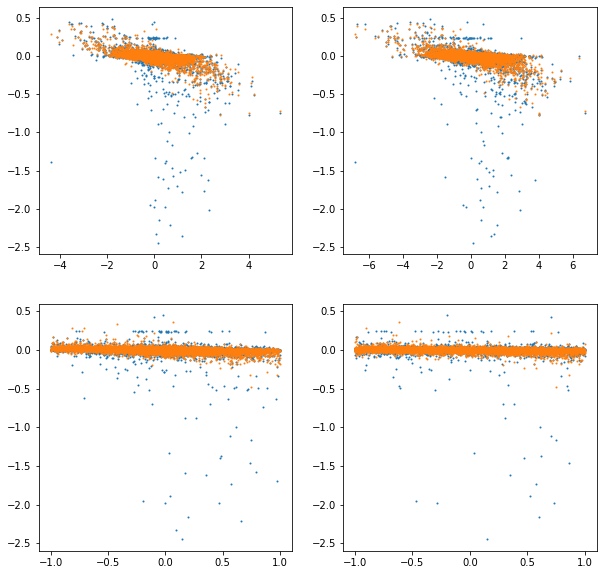

In [87]:
data=datasets['Total']
fig,axs=plt.subplots(2,2,figsize=(10,10))
ax=axs[0][0]
ax.scatter(data['specZ_outlCoeff_Min'],data['resid_SED'],s=1)
ax.scatter(data['specZ_outlCoeff_Min'],data['resid_ML'],s=1)
ax=axs[0][1]
ax.scatter(data['specZ_outlCoeff_000'],data['resid_SED'],s=1)
ax.scatter(data['specZ_outlCoeff_000'],data['resid_ML'],s=1)
ax=axs[1][0]
data=datasets['Total']
data=data[data['specZ_outlCoeff_Min'].abs()<1]
ax.scatter(data['specZ_outlCoeff_Min'],data['resid_SED'],s=1)
ax.scatter(data['specZ_outlCoeff_Min'],data['resid_ML'],s=1)
ax=axs[1][1]
data=datasets['Total']
data=data[data['specZ_outlCoeff_000'].abs()<1]
ax.scatter(data['specZ_outlCoeff_000'],data['resid_SED'],s=1)
ax.scatter(data['specZ_outlCoeff_000'],data['resid_ML'],s=1)

Text(0.5, 113.99999999999989, '$K_\\mathrm{SED}$\nTotal dataset')

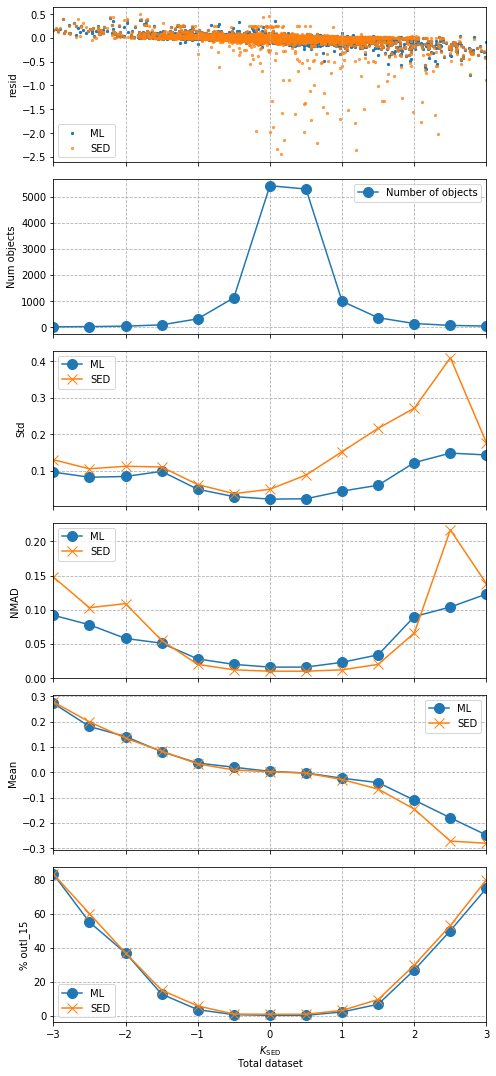

In [78]:
### Plot statistics for different outlCoeff ###
datasetNamesPlot=['Total']
data=[datasets[name] for name in datasetNamesPlot]
stats=[statAll[name] for name in datasetNamesPlot]
case=specZ
fig,axs=plotStatsForOutlCoeff(data,case,stats,datasetNamesPlot)
axs[-1][0].set_xlabel(r'$K_\mathrm{SED}$'+'\n'+ datasetNamesPlot[0]+' dataset')

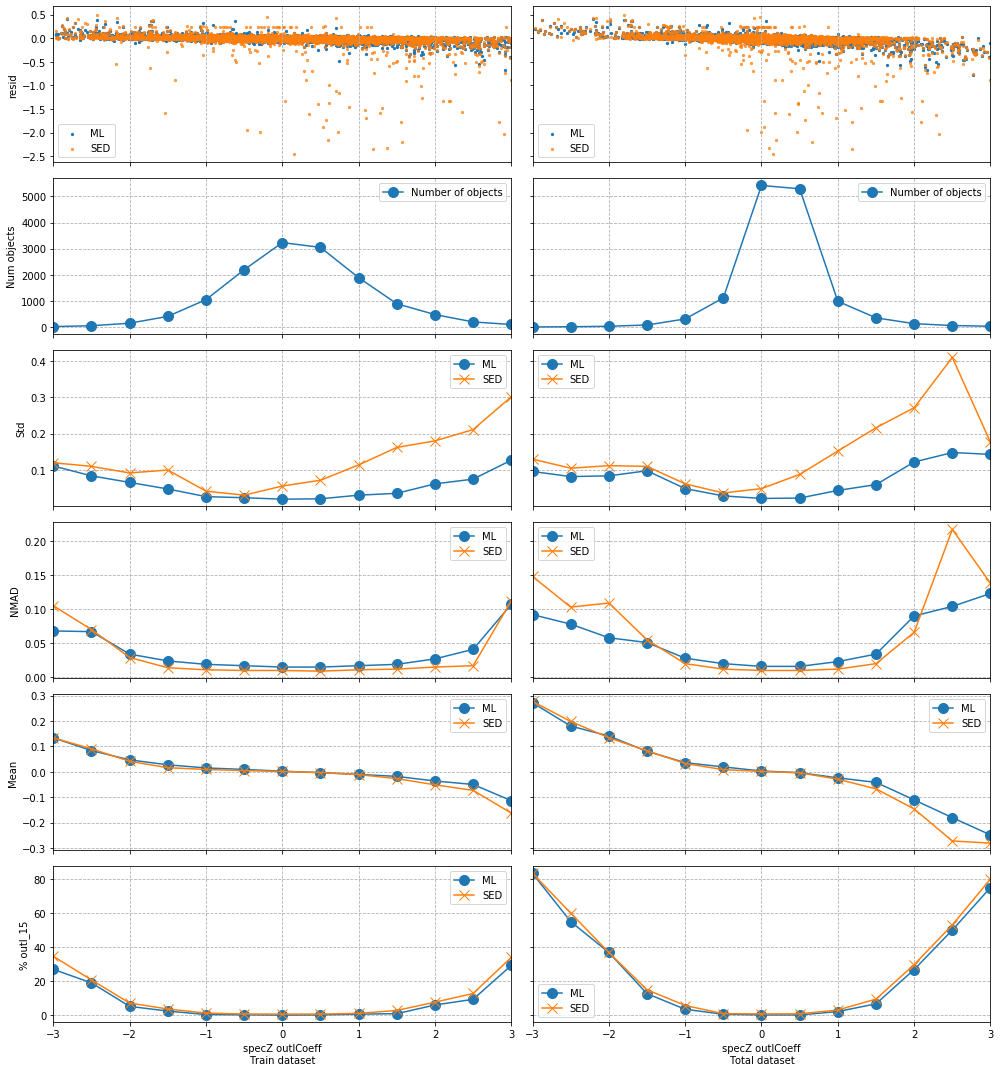

In [63]:
### Plot statistics for different outlCoeff ###
datasetNamesPlot=['Train','Total']
data=[datasets[name] for name in datasetNamesPlot]
stats=[statAll[name] for name in datasetNamesPlot]
case=specZ
fig=plotStatsForOutlCoeff(data,case,stats,datasetNamesPlot)

### PhotoZ_ML outlier filtering
<a id='PhotoZ_ML'>#PhotoZ_ML</a>

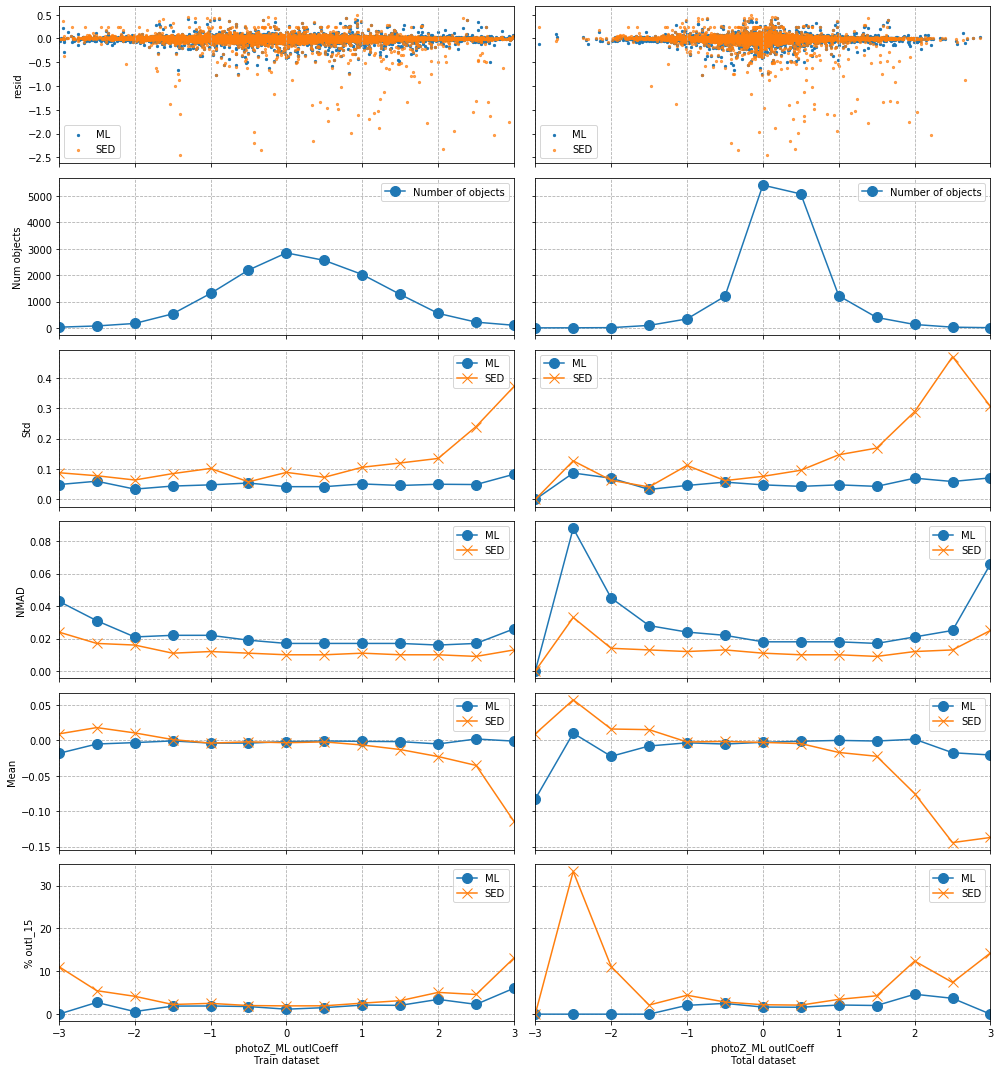

In [64]:
### Plot statistics for different outlCoeff ###
datasetNamesPlot=['Train','Total']
data=[datasets[name] for name in datasetNamesPlot]
stats=[statAll[name] for name in datasetNamesPlot]
case=photoZ_ML
fig=plotStatsForOutlCoeff(data,case,stats,datasetNamesPlot)

### PhotoZ_SED outlier filtering
<a id='PhotoZ_SED'>#PhotoZ_SED</a>

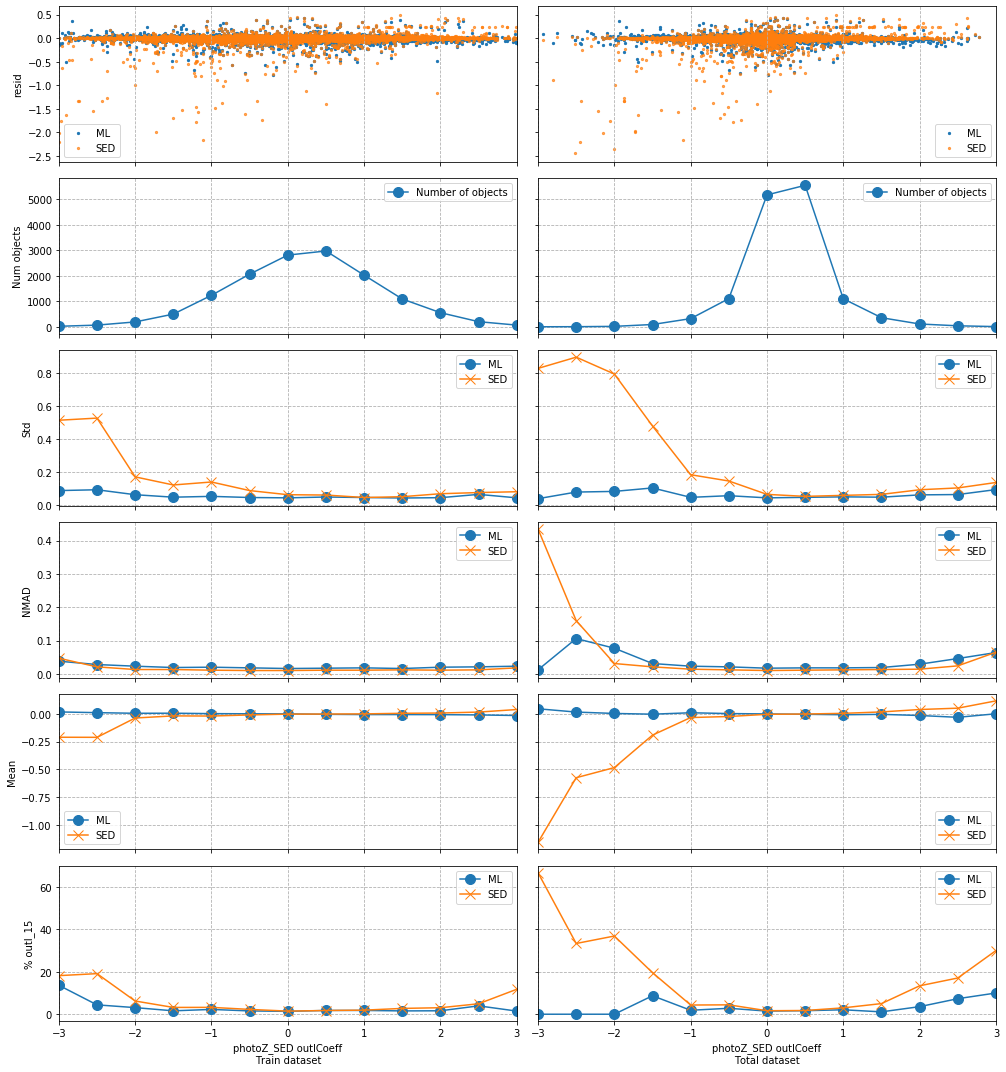

In [65]:
### Plot statistics for different outlCoeff ###
datasetNamesPlot=['Train','Total']
data=[datasets[name] for name in datasetNamesPlot]
stats=[statAll[name] for name in datasetNamesPlot]
case=photoZ_SED
fig=plotStatsForOutlCoeff(data,case,stats,datasetNamesPlot)

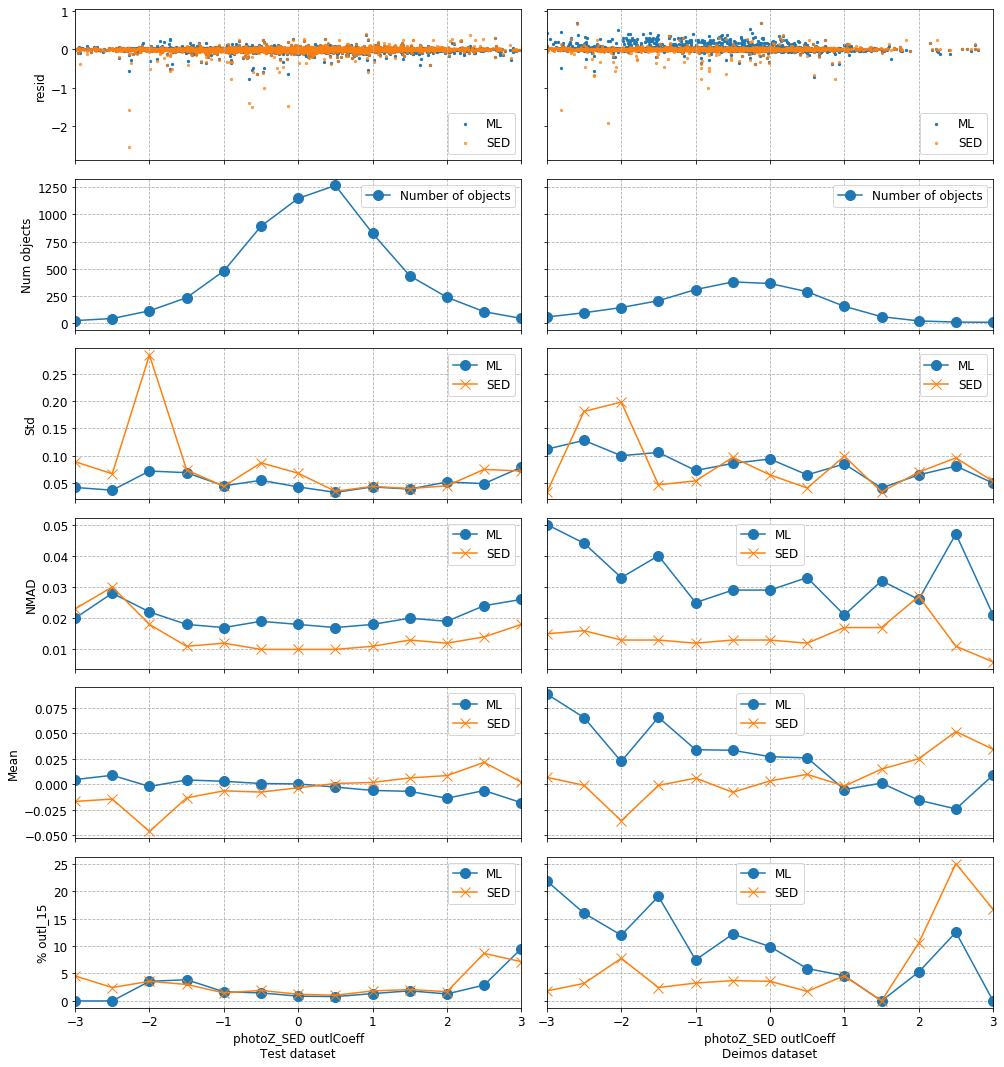

In [117]:
### Plot statistics for different outlCoeff ###
datasetNamesPlot=['Test','Deimos']
data=[datasets[name] for name in datasetNamesPlot]
stats=[statAll[name] for name in datasetNamesPlot]
case=photoZ_SED
fig=plotStatsForOutlCoeff(data,case,stats,datasetNamesPlot)

In [66]:
def plotStatsForOutlCoeff2(data,case,stats,datasetNames,lims=(-3,3)):
    fig,axs=plt.subplots(6,len(data),figsize=(4*len(data),13),sharey='row',sharex='col')
    if len(data)==1:
        axs=[[ax] for ax in axs]
    estimators=['Std','NMAD','Mean','% outl_15']
    i=0
    textSize=12
    for j,d in enumerate(data):
        c=case[j]
        axs[i][j].set_xlim(lims)
        if datasetNames[i]=='Total':
            axs[i][j].scatter(d[c+'_outlCoeff_Min'],d[residML],s=5,label='ML')
            axs[i][j].scatter(d[c+'_outlCoeff_Min'],d[residSED],s=5,label='SED',alpha=0.7)
        else:
            axs[i][j].scatter(d[c+'_outlCoeff'],d[residML],s=5,label='ML')
            axs[i][j].scatter(d[c+'_outlCoeff'],d[residSED],s=5,label='SED',alpha=0.7)
        axs[i][j].grid(axis='x',linestyle ='--')
        axs[i][j].legend()
        axs[i][0].set_ylabel('resid',size=textSize)

    i=1
    for j,s in enumerate(stats):
        c=case[j]
        axs[i][j].set_xlim(lims)
        axs[i][j].plot(s['outlCoeff_'+c]['General']['binEdge'],s['outlCoeff_'+c]['General']['Num objects'],
                       markersize=10,label='Number of objects',marker='o')
        axs[i][j].grid(axis='x',linestyle ='--')
        axs[i][j].grid(axis='y',linestyle ='--')
        axs[i][j].legend()
        axs[i][0].set_ylabel('Num objects',size=textSize)

    ii=2
    for i,est in enumerate(estimators):
        for j,s in enumerate(stats):
            c=case[j]
            if est=='Mean':
                axs[i+ii][j].axhline(0,color='black',ls='--',lw=0.5)
            axs[i+ii][j].grid(axis='y',linestyle ='--')
            axs[i+ii][j].grid(axis='x',linestyle ='--')
            s=s['outlCoeff_'+c][(s['outlCoeff_'+c]['General']['binEdge']>=lims[0]) & (s['outlCoeff_'+c]['General']['binEdge']<=lims[1])]
            s=s.mask(s['General']['Num objects']<=15)
            axs[i+ii][j].plot(s['General']['binEdge'],
                                s[residML][est],markersize=10,label='ML',marker='o')
            axs[i+ii][j].plot(s['General']['binEdge'],
                                s[residSED][est],markersize=10,label='SED',marker='x')
            axs[i+ii][j].set_xlim(lims)
            axs[i+ii][j].legend()
        axs[i+ii][0].set_ylabel(est,size=textSize)
    for j in range(len(datasetNames)):
        axs[-1][j].set_xlabel(case[j]+' outlCoeff\n'+ datasetNames[j]+' dataset',size=textSize)
    plt.tight_layout()
    return fig

SyntaxError: invalid syntax (<ipython-input-66-c9b5241e37b4>, line 14)

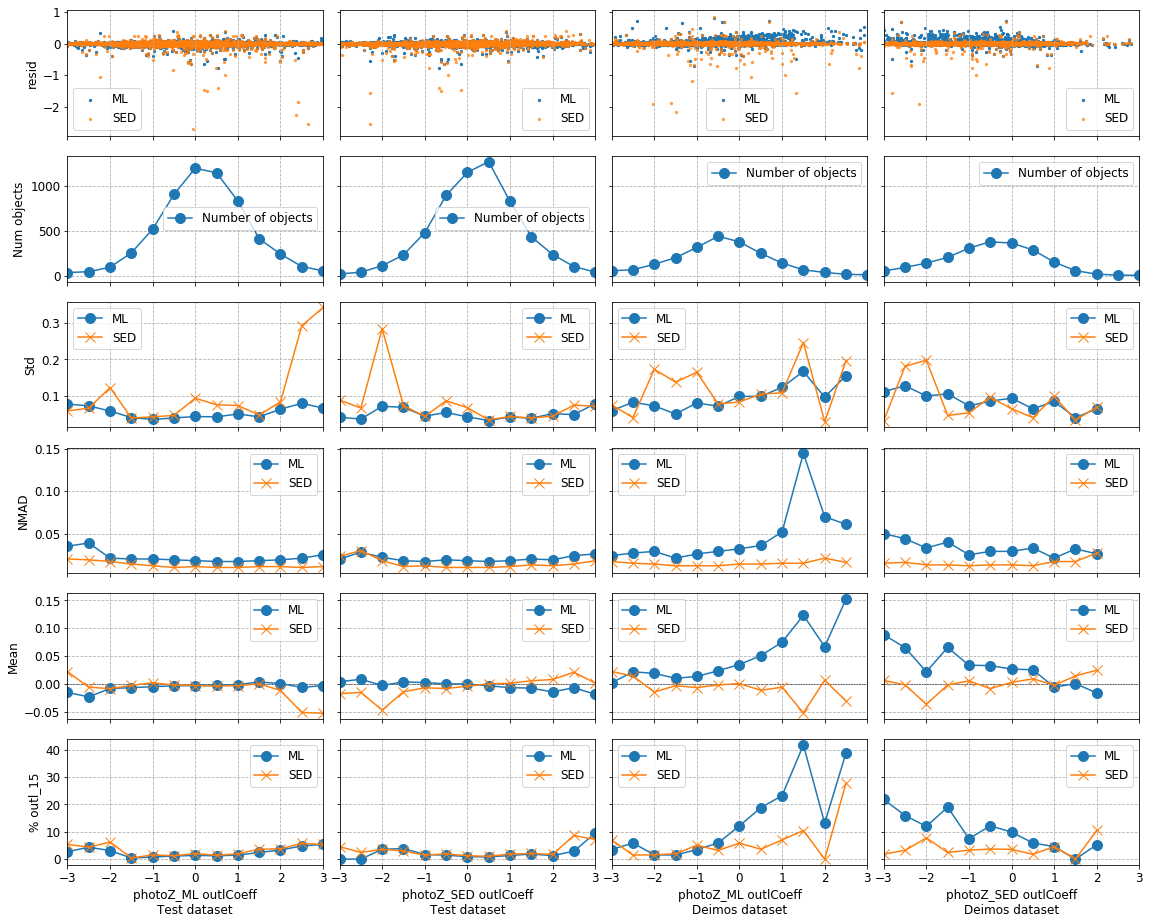

In [119]:
### Plot statistics for different outlCoeff ###
datasetNamesPlot=['Test','Test','Deimos','Deimos']
data=[datasets[name] for name in datasetNamesPlot]
stats=[statAll[name] for name in datasetNamesPlot]
case=[photoZ_ML,photoZ_SED,photoZ_ML,photoZ_SED,]
fig=plotStatsForOutlCoeff2(data,case,stats,datasetNamesPlot)

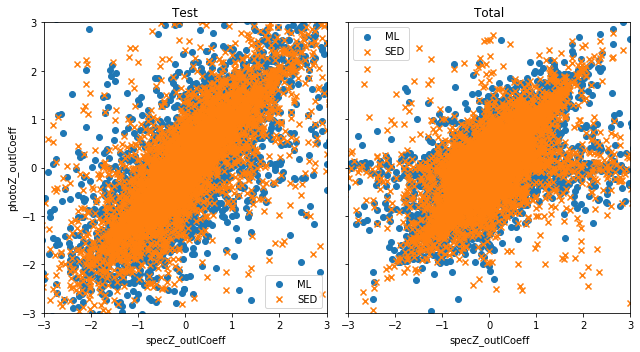

In [69]:
### Spec_z outl coeff vs Photo-z outl coeff ###
fig,axs=plt.subplots(1,2,figsize=(9,5),sharey='row',sharex='col')
datasetNames=['Test','Total']
for i,name in enumerate(datasetNames):
    if name=='Total':
        axs[i].scatter(datasets[name][specZ+'_outlCoeff_Min'],datasets[name][photoZ_ML+'_outlCoeff_Min'],label='ML')
        axs[i].scatter(datasets[name][specZ+'_outlCoeff_Min'],datasets[name][photoZ_SED+'_outlCoeff_Min'],marker='x',label='SED')
    else:
        axs[i].scatter(datasets[name][specZ+'_outlCoeff'],datasets[name][photoZ_ML+'_outlCoeff'],label='ML')
        axs[i].scatter(datasets[name][specZ+'_outlCoeff'],datasets[name][photoZ_SED+'_outlCoeff'],marker='x',label='SED')
    axs[i].set_xlabel('specZ_outlCoeff')
    
    axs[i].set_xlim((-3,3))
    axs[i].set_ylim((-3,3))
    axs[i].set_title(name)
    axs[i].legend()
axs[0].set_ylabel('photoZ_outlCoeff')
plt.tight_layout()

In [126]:
def plotStatsForOutlCoeff5(data,case,stats,datasetNames,lims=(-3,3)):
    fig,axs=plt.subplots(6,len(data),figsize=(4*len(data),18),sharey='row',sharex='col')
    if len(data)==1:
        axs=[[ax] for ax in axs]
    estimators=['Std','NMAD','Mean','% outl_15']
    i=0
    textSize=13
    for j,d in enumerate(data):
        c=case[j]
        axs[i][j].set_xlim(lims)
        c=c.replace('_activMapClean','')
        c=c.replace('outlCoeff_','')+'_outlCoeff'
        axs[i][j].scatter(d[c],d[residML],s=5,label='ML')
        axs[i][j].scatter(d[c],d[residSED],s=5,label='SED',alpha=0.7)
        axs[i][j].set_ylim(-0.5,0.5)
        axs[i][j].grid(axis='x',linestyle ='--')
    
        leg = axs[i][j].legend(fontsize=textSize)
        leg.get_frame().set_linewidth(2.0)
        axs[i][j].tick_params(axis='both', labelsize=textSize)
    axs[i][0].set_ylabel('resid',size=textSize)
    axs[i][0].yaxis.set_label_coords(-0.18, 0.5)

    i=1
    for j,s in enumerate(stats):
        k=case[j]
        axs[i][j].set_xlim(lims)
        axs[i][j].plot(s[k]['General']['binEdge'],s[k]['General']['Num objects'],
                       markersize=8,label='Number of objects',marker='s', color='black')
        axs[i][j].grid(axis='x',linestyle ='--')
        axs[i][j].grid(axis='y',linestyle ='--')
        leg=axs[i][j].legend(fontsize=textSize)
        leg.get_frame().set_linewidth(2.0)
        axs[i][j].tick_params(axis='both', labelsize=textSize)
    axs[i][0].set_ylabel('Num objects',size=textSize)
    axs[i][0].yaxis.set_label_coords(-0.18, 0.5)

    ii=2
    for i,est in enumerate(estimators):
        for j,s in enumerate(stats):
            k=case[j]
            axs[i+ii][j].grid(axis='y',linestyle ='--')
            axs[i+ii][j].grid(axis='x',linestyle ='--')
            if est=='Mean':
                axs[i+ii][j].axhline(0,color='black',ls='--',lw=0.5)
            s=s[k][(s[k]['General']['binEdge']>=lims[0]) & 
                                (s[k]['General']['binEdge']<=lims[1])]
            s=s.mask(s['General']['Num objects']<=15)
            axs[i+ii][j].plot(s['General']['binEdge'],
                                s[residML][est],markersize=8,label='ML',marker='o')
            axs[i+ii][j].plot(s['General']['binEdge'],
                                s[residSED][est],markersize=8,label='SED',marker='x')
            axs[i+ii][j].set_xlim(lims)
            axs[i+ii][j].tick_params(axis='both', labelsize=textSize)
            
            leg=axs[i+ii][j].legend(fontsize=textSize)
            leg.get_frame().set_linewidth(2.0)
        axs[i+ii][0].set_ylabel(est,size=textSize)
        axs[i+ii][0].yaxis.set_label_coords(-0.18, 0.5)
    for j in range(len(datasetNames)):
        if '_activMap' in case[j]:
            xlabel=case[j].replace('_activMapClean','')+' \n'+ datasetNames[j]+' dataset \n after activMap filtering'
        else:
            xlabel=case[j]+' \n'+ datasetNames[j]+' dataset \n '
        axs[-1][j].set_xlabel(xlabel,size=textSize)
    plt.tight_layout()
    return fig,axs

Text(0.5, 137.99999999999986, '$K_\\mathrm{spec}$\nDeimos dataset\n after occupation map filtering')

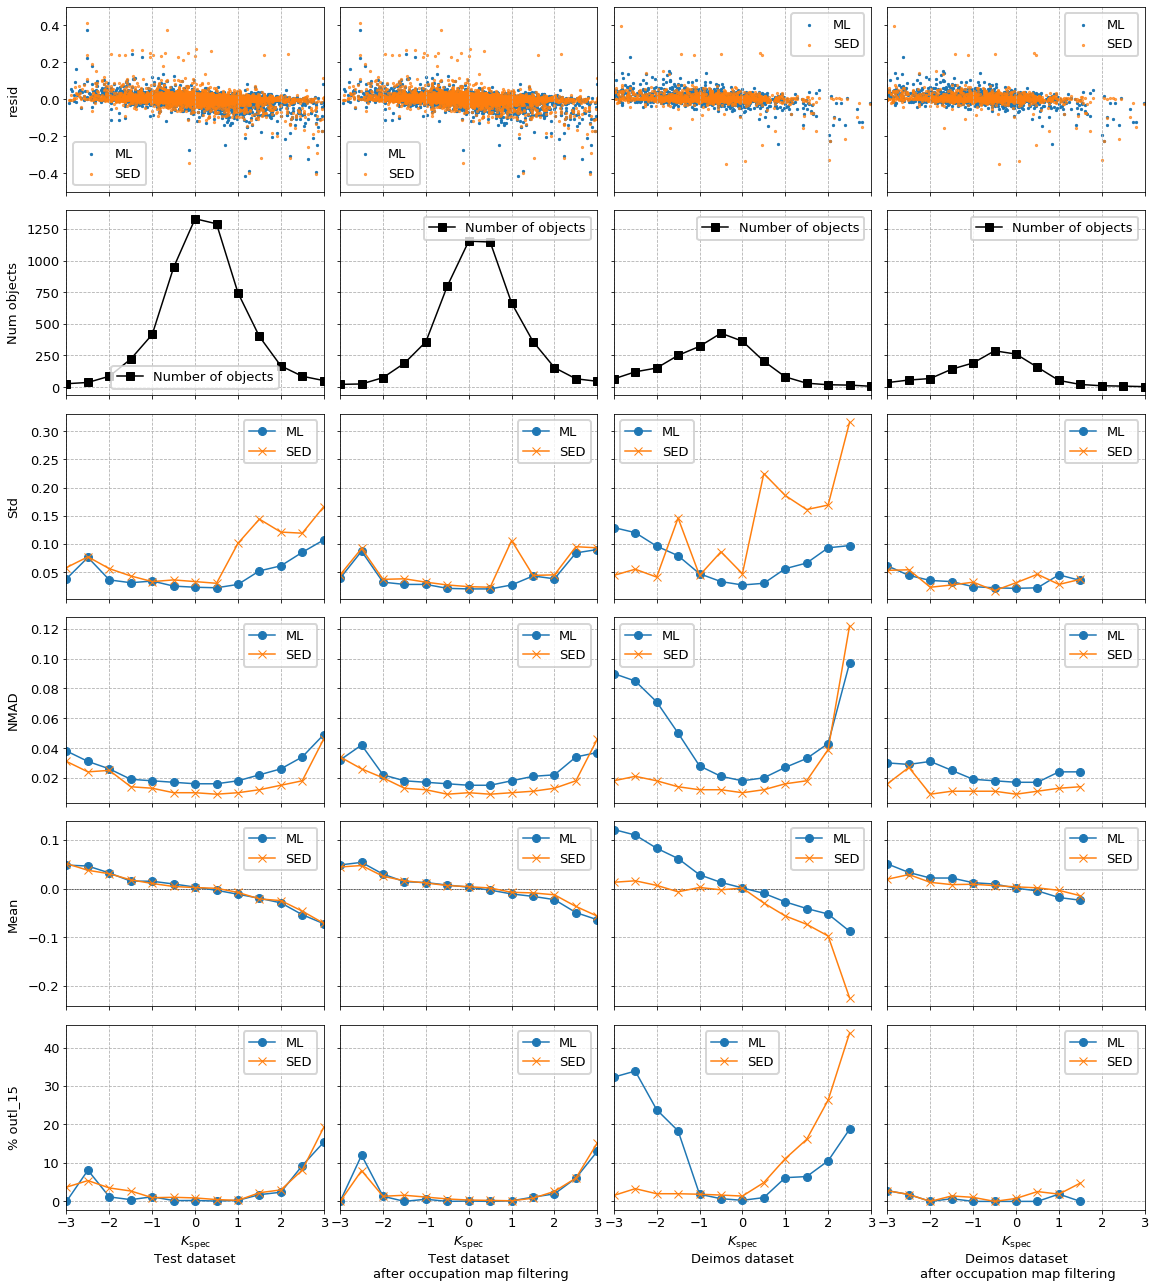

In [127]:
### Plot statistics for different outlCoeff ###
datasetNamesPlot=['Test','Test','Deimos','Deimos']
data=[datasets[name] for name in datasetNamesPlot]
data=[d[d['trainMapOccupation']>=5] for d in data]
stats=[statAll[name] for name in datasetNamesPlot]
case=['outlCoeff_'+specZ,'outlCoeff_'+specZ+'_activMapClean','outlCoeff_'+specZ,'outlCoeff_'+specZ+'_activMapClean']
fig,axs=plotStatsForOutlCoeff5(data,case,stats,datasetNamesPlot,lims=(-3,3))
axs[-1][0].set_xlabel(r'$K_\mathrm{spec}$'+'\n'+ datasetNamesPlot[0]+' dataset')
axs[-1][1].set_xlabel(r'$K_\mathrm{spec}$'+'\n'+ datasetNamesPlot[1]+' dataset\n after occupation map filtering')
axs[-1][2].set_xlabel(r'$K_\mathrm{spec}$'+'\n'+ datasetNamesPlot[2]+' dataset')
axs[-1][3].set_xlabel(r'$K_\mathrm{spec}$'+'\n'+ datasetNamesPlot[3]+' dataset\n after occupation map filtering')

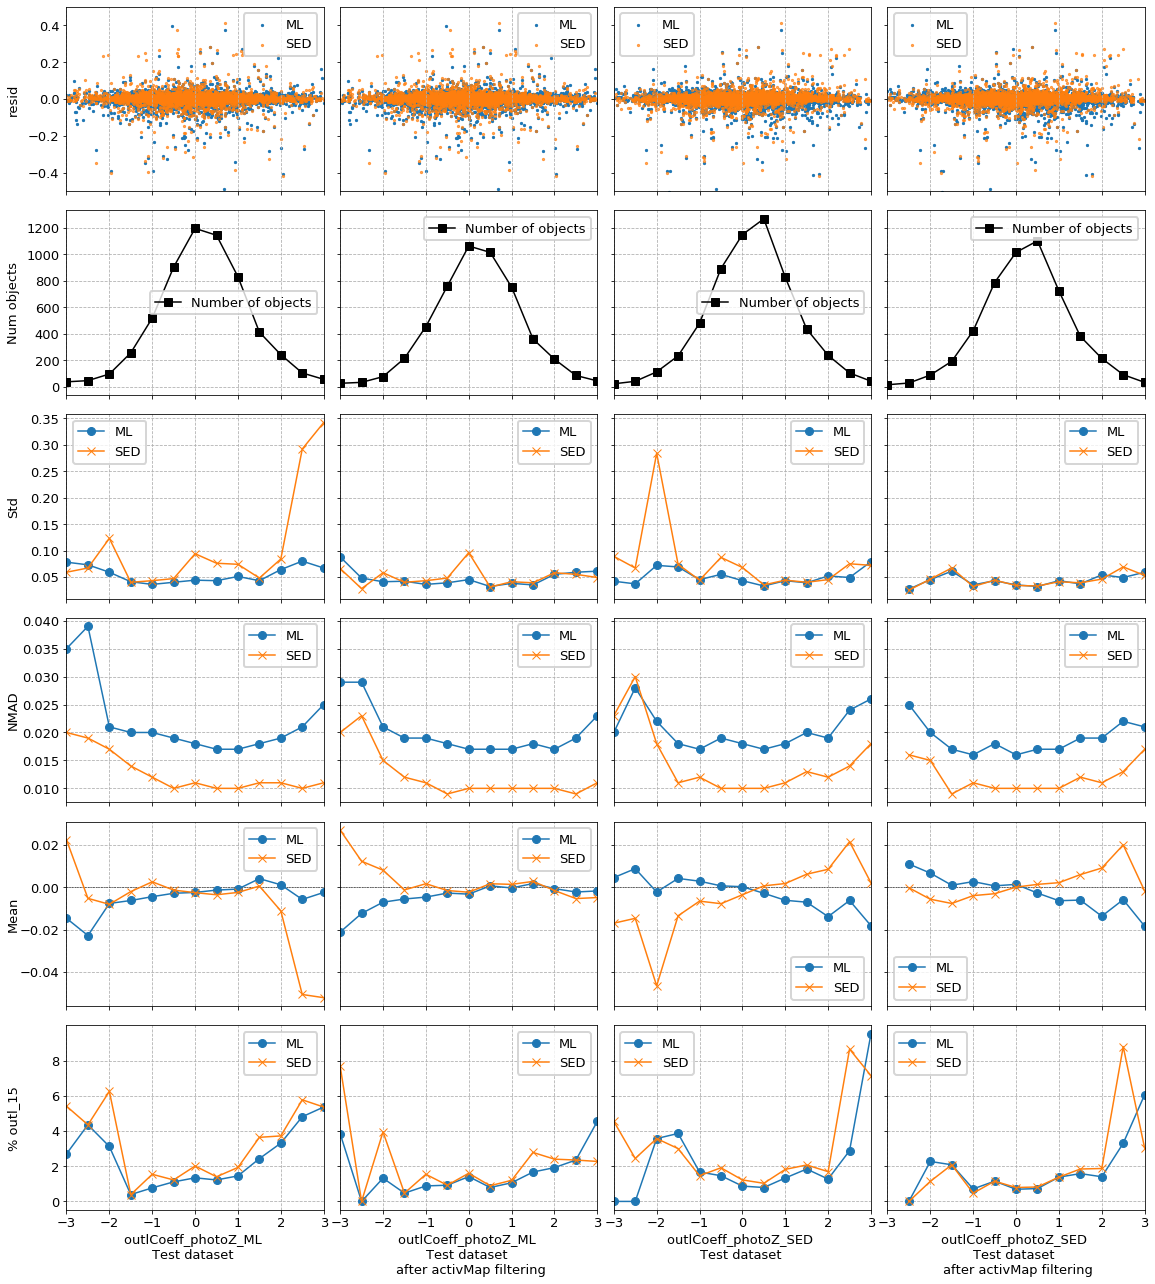

In [128]:
### Plot statistics for different outlCoeff ###
datasetNamesPlot=['Test','Test','Test','Test']
data=[datasets[name] for name in datasetNamesPlot]
data=[d[d['trainMapOccupation']>=5] for d in data]
stats=[statAll[name] for name in datasetNamesPlot]
case=['outlCoeff_'+photoZ_ML,'outlCoeff_'+photoZ_ML+'_activMapClean',
      'outlCoeff_'+photoZ_SED,'outlCoeff_'+photoZ_SED+'_activMapClean']
fig=plotStatsForOutlCoeff5(data,case,stats,datasetNamesPlot,lims=(-3,3))

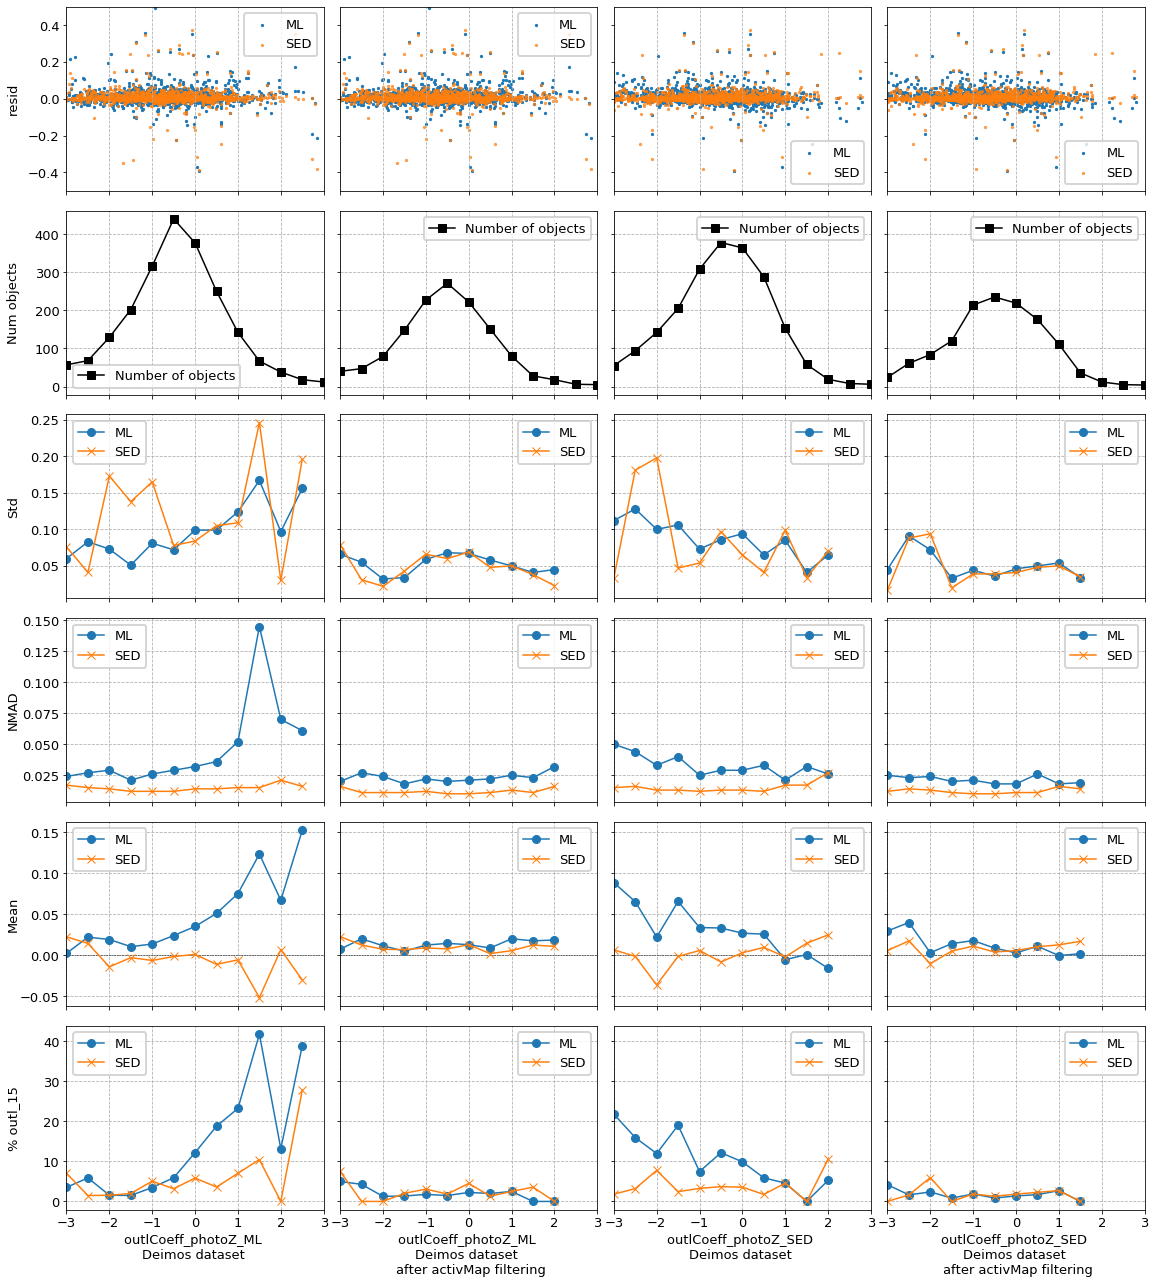

In [129]:
### Plot statistics for different outlCoeff ###
datasetNamesPlot=['Deimos','Deimos','Deimos','Deimos']
data=[datasets[name] for name in datasetNamesPlot]
data=[d[d['trainMapOccupation']>=5] for d in data]
stats=[statAll[name] for name in datasetNamesPlot]
case=['outlCoeff_'+photoZ_ML,'outlCoeff_'+photoZ_ML+'_activMapClean',
      'outlCoeff_'+photoZ_SED,'outlCoeff_'+photoZ_SED+'_activMapClean']
fig=plotStatsForOutlCoeff5(data,case,stats,datasetNamesPlot,lims=(-3,3))

In [70]:
from matplotlib.ticker import FormatStrFormatter

In [71]:
def plotAxScatter(ax,d,xlimmin,xlimmax,ylimmin,ylimmax,title):
    ax.scatter(d[specZ],d[photoZ_ML],label='ML',s=5)
    ax.scatter(d[specZ],d[photoZ_SED],label='SED',s=5)
    ax.plot(d[specZ],d[specZ],lw=0.5,c='black')
    ax.plot(d[specZ],d[specZ]+0.15*(1+d[specZ]),linewidth=0.5,linestyle='dashed',c='gray')
    ax.plot(d[specZ],d[specZ]-0.15*(1+d[specZ]),linewidth=0.5,linestyle='dashed',c='gray')
    ax.set_xlim(xlimmin,xlimmax)
    ax.set_ylim(ylimmin,ylimmax)
    ax.set_xlabel('spec-z')
    ax.set_ylabel('photo-z')
    ax.legend()
    ax.set_title(title)
    ax.set_aspect(1, adjustable='box')
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    return ax

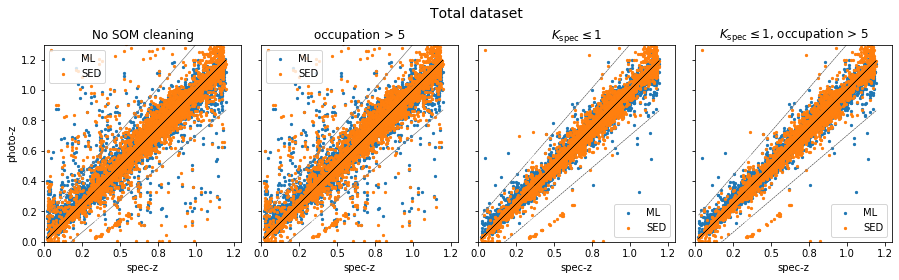

In [76]:
fig,axs=plt.subplots(1,4,figsize=(15.2,3.8),sharey='row',sharex='col')
fig.suptitle('Total dataset', fontsize=14,y=1.0,x=0.52)
xlimmin=0
xlimmax=1.3
ylimmin=0
ylimmax=1.3
d=datasets['Total']
ax=axs[0]
plotAxScatter(ax,d,xlimmin,xlimmax,ylimmin,ylimmax,title='No SOM cleaning')

d=datasets['Total']
d=d[d['trainMapOccupation']>5]
ax=axs[1]
plotAxScatter(ax,d,xlimmin,xlimmax,ylimmin,ylimmax,title='occupation > 5')
ax.set_ylabel(None)

d=datasets['Total']
d=d[d['specZ_outlCoeff_000'].abs()<=1]
ax=axs[2]
plotAxScatter(ax,d,xlimmin,xlimmax,ylimmin,ylimmax,title=r'$K_\mathrm{spec} \leq 1$')
ax.set_ylabel(None)

d=datasets['Total']
d=d[d['trainMapOccupation']>5]
d=d[d['specZ_outlCoeff_000'].abs()<=1]
ax=axs[3]
plotAxScatter(ax,d,xlimmin,xlimmax,ylimmin,ylimmax,title=r'$K_\mathrm{spec} \leq 1$'+', occupation > 5')
ax.set_ylabel(None)
#plt.tight_layout(pad=0.01)
plt.subplots_adjust(wspace=0.1)

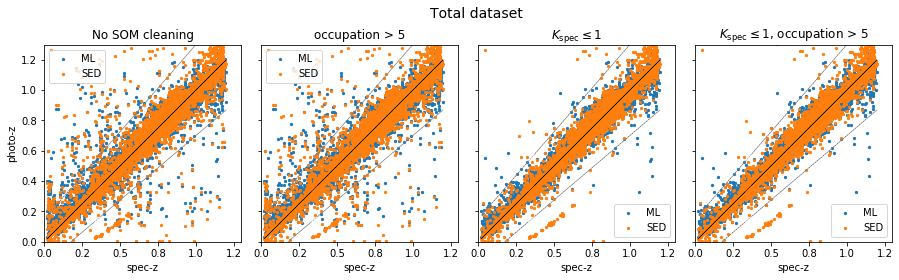

In [77]:
fig,axs=plt.subplots(1,4,figsize=(15.2,3.8),sharey='row',sharex='col')
fig.suptitle('Total dataset', fontsize=14,y=1.0,x=0.52)
xlimmin=0
xlimmax=1.3
ylimmin=0
ylimmax=1.3
d=datasets['Total']
ax=axs[0]
plotAxScatter(ax,d,xlimmin,xlimmax,ylimmin,ylimmax,title='No SOM cleaning')

d=datasets['Total']
d=d[d['trainMapOccupation']>5]
ax=axs[1]
plotAxScatter(ax,d,xlimmin,xlimmax,ylimmin,ylimmax,title='occupation > 5')
ax.set_ylabel(None)

d=datasets['Total']
d=d[d['specZ_outlCoeff_Min'].abs()<=1]
ax=axs[2]
plotAxScatter(ax,d,xlimmin,xlimmax,ylimmin,ylimmax,title=r'$K_\mathrm{spec} \leq 1$')
ax.set_ylabel(None)

d=datasets['Total']
d=d[d['trainMapOccupation']>5]
d=d[d['specZ_outlCoeff_Min'].abs()<=1]
ax=axs[3]
plotAxScatter(ax,d,xlimmin,xlimmax,ylimmin,ylimmax,title=r'$K_\mathrm{spec} \leq 1$'+', occupation > 5')
ax.set_ylabel(None)
#plt.tight_layout(pad=0.01)
plt.subplots_adjust(wspace=0.1)

### General statistics table
<a id='statTab'>#statTab</a>

In [88]:
statAll['Train']['Basic'][['resid_ML','resid_SED','General']]

resid_ML                 \
                                                      Std   NMAD    Mean   
case                                                                       
No filtering                                        0.047  0.018  -0.002   
trainMapOccupation>5                                0.047  0.018 -0.0021   
specZ_outlCoeff<=1                                  0.024  0.016       0   
specZ_outlCoeff + occupation filters                0.024  0.016  0.0001   
photoZ_ML_outlCoeff<=1                              0.047  0.018 -0.0018   
photoZ_ML_outlCoeff + occupation filters            0.047  0.018 -0.0017   
photoZ_SED_outlCoeff<=1                             0.045  0.017 -0.0021   
photoZ_SED_outlCoeff + occupation filters           0.045  0.017 -0.0021   
photoZ_ML_outlCoeff<=1, specZ_outlCoeff<=1          0.022  0.016  0.0003   
photoZ_ML_outlCoeff+ specZ + occupation filters     0.022  0.016  0.0004   
photoZ_SED_outlCoeff<=1, specZ_outlCoeff<=1         0.022  0.016  0.0003   
photoZ_SED_outlCoeff+ specZ + occupation filters    0.022  0.016  0.0004   

                                                           resid_SED         \
                                                 % outl_15       Std   NMAD   
case                                                                          
No filtering                                           1.8     0.101  0.011   
trainMapOccupation>5                                  1.75     0.096  0.011   
specZ_outlCoeff<=1                                    0.21     0.072   0.01   
specZ_outlCoeff + occupation filters                   0.2     0.063   0.01   
photoZ_ML_outlCoeff<=1                                 1.6     0.083  0.011   
photoZ_ML_outlCoeff + occupation filters              1.57     0.076  0.011   
photoZ_SED_outlCoeff<=1                               1.61     0.065   0.01   
photoZ_SED_outlCoeff + occupation filters             1.56     0.061   0.01   
photoZ_ML_outlCoeff<=1, specZ_outlCoeff<=1            0.12     0.063   0.01   
photoZ_ML_outlCoeff+ specZ + occupation filters       0.09     0.051   0.01   
photoZ_SED_outlCoeff<=1, specZ_outlCoeff<=1           0.11     0.044  0.009   
photoZ_SED_outlCoeff+ specZ + occupation filters      0.09     0.039  0.009   

                                                                       General  
                                                    Mean % outl_15 Num objects  
case                                                                            
No filtering                                     -0.0059      2.56     13922.0  
trainMapOccupation>5                             -0.0051      2.45     13701.0  
specZ_outlCoeff<=1                               -0.0013      0.73     10376.0  
specZ_outlCoeff + occupation filters             -0.0005      0.65     10240.0  
photoZ_ML_outlCoeff<=1                           -0.0033       2.1      9630.0  
photoZ_ML_outlCoeff + occupation filters         -0.0025         2      9503.0  
photoZ_SED_outlCoeff<=1                           -0.003      1.81      9895.0  
photoZ_SED_outlCoeff + occupation filters        -0.0026      1.71      9766.0  
photoZ_ML_outlCoeff<=1, specZ_outlCoeff<=1       -0.0002      0.56      8535.0  
photoZ_ML_outlCoeff+ specZ + occupation filters   0.0007      0.47      8433.0  
photoZ_SED_outlCoeff<=1, specZ_outlCoeff<=1       0.0003      0.21      8915.0  
photoZ_SED_outlCoeff+ specZ + occupation filters  0.0006      0.16      8816.0

In [90]:
statAll['Total']['Basic'][['resid_ML','resid_SED','General']]

resid_ML                 \
                                                        Std   NMAD    Mean   
case                                                                         
No filtering                                          0.047  0.018  -0.002   
trainMapOccupation>5                                  0.047  0.018 -0.0021   
specZ_outlCoeff_Min<=1                                0.027  0.017 -0.0001   
specZ_outlCoeff_Min + occupation filters              0.027  0.017 -0.0001   
photoZ_ML_outlCoeff_Min<=1                            0.047  0.018  -0.002   
photoZ_ML_outlCoeff_Min + occupation filters          0.047  0.018  -0.002   
photoZ_SED_outlCoeff_Min<=1                           0.046  0.018 -0.0021   
photoZ_SED_outlCoeff_Min + occupation filters         0.046  0.018 -0.0021   
photoZ_ML_outlCoeff_Min<=1, specZ_outlCoeff<=1        0.026  0.017       0   
photoZ_ML_outlCoeff_Min+ specZ + occupation fil...    0.026  0.017       0   
photoZ_SED_outlCoeff_Min<=1, specZ_outlCoeff<=1       0.026  0.017 -0.0001   
photoZ_SED_outlCoeff_Min+ specZ + occupation fi...    0.026  0.017 -0.0001   

                                                             resid_SED         \
                                                   % outl_15       Std   NMAD   
case                                                                            
No filtering                                             1.8     0.101  0.011   
trainMapOccupation>5                                    1.75     0.096  0.011   
specZ_outlCoeff_Min<=1                                  0.32     0.079   0.01   
specZ_outlCoeff_Min + occupation filters                 0.3     0.072   0.01   
photoZ_ML_outlCoeff_Min<=1                              1.77     0.092  0.011   
photoZ_ML_outlCoeff_Min + occupation filters            1.73     0.086  0.011   
photoZ_SED_outlCoeff_Min<=1                             1.71      0.07  0.011   
photoZ_SED_outlCoeff_Min + occupation filters           1.66     0.066  0.011   
photoZ_ML_outlCoeff_Min<=1, specZ_outlCoeff<=1          0.28     0.077   0.01   
photoZ_ML_outlCoeff_Min+ specZ + occupation fil...      0.26      0.07   0.01   
photoZ_SED_outlCoeff_Min<=1, specZ_outlCoeff<=1         0.28     0.051   0.01   
photoZ_SED_outlCoeff_Min+ specZ + occupation fi...      0.25     0.048   0.01   

                                                                      \
                                                      Mean % outl_15   
case                                                                   
No filtering                                       -0.0059      2.56   
trainMapOccupation>5                               -0.0051      2.45   
specZ_outlCoeff_Min<=1                             -0.0024      0.95   
specZ_outlCoeff_Min + occupation filters           -0.0016      0.87   
photoZ_ML_outlCoeff_Min<=1                         -0.0046      2.35   
photoZ_ML_outlCoeff_Min + occupation filters        -0.004      2.25   
photoZ_SED_outlCoeff_Min<=1                        -0.0036      2.04   
photoZ_SED_outlCoeff_Min + occupation filters      -0.0032      1.93   
photoZ_ML_outlCoeff_Min<=1, specZ_outlCoeff<=1     -0.0021      0.85   
photoZ_ML_outlCoeff_Min+ specZ + occupation fil... -0.0014      0.78   
photoZ_SED_outlCoeff_Min<=1, specZ_outlCoeff<=1     -0.001      0.53   
photoZ_SED_outlCoeff_Min+ specZ + occupation fi... -0.0006      0.46   

                                                       General  
                                                   Num objects  
case                                                            
No filtering                                           13922.0  
trainMapOccupation>5                                   13701.0  
specZ_outlCoeff_Min<=1                                 12817.0  
specZ_outlCoeff_Min + occupation filters               12616.0  
photoZ_ML_outlCoeff_Min<=1                             12916.0  
photoZ_ML_outlCoeff_Min + occupation filters           12716.0 

In [136]:
statAll['Deimos']['Basic'][['residML_SED','General']]

residML_SED                 \
                                                         Std   NMAD    Mean   
case                                                                          
No filtering                                           0.102  0.033  0.0355   
trainMapOccupation>5                                   0.047  0.023  0.0031   
specZ_outlCoeff<=1                                      0.07  0.023  0.0049   
specZ_outlCoeff + occupation filters                   0.036   0.02 -0.0028   
photoZ_ML_outlCoeff<=1                                 0.088  0.034  0.0392   
photoZ_ML_outlCoeff + occupation filters               0.043  0.022  0.0048   
photoZ_SED_outlCoeff<=1                                0.072   0.03  0.0224   
photoZ_SED_outlCoeff + occupation filters               0.03  0.022 -0.0015   
photoZ_ML_outlCoeff<=1, specZ_outlCoeff<=1             0.049  0.021  0.0055   
photoZ_ML_outlCoeff+ specZ + occupation filters        0.035  0.019 -0.0016   
photoZ_SED_outlCoeff<=1, specZ_outlCoeff<=1            0.038  0.022  0.0003   
photoZ_SED_outlCoeff+ specZ + occupation filters       0.025   0.02 -0.0032   

                                                               General  
                                                 % outl_15 Num objects  
case                                                                    
No filtering                                         11.35      2255.0  
trainMapOccupation>5                                  1.52      1382.0  
specZ_outlCoeff<=1                                    2.88      1075.0  
specZ_outlCoeff + occupation filters                  0.92       758.0  
photoZ_ML_outlCoeff<=1                               11.75      1209.0  
photoZ_ML_outlCoeff + occupation filters              0.97       724.0  
photoZ_SED_outlCoeff<=1                               7.44      1183.0  
photoZ_SED_outlCoeff + occupation filters             0.27       741.0  
photoZ_ML_outlCoeff<=1, specZ_outlCoeff<=1            2.03       790.0  
photoZ_ML_outlCoeff+ specZ + occupation filters        0.7       574.0  
photoZ_SED_outlCoeff<=1, specZ_outlCoeff<=1           0.71       848.0  
photoZ_SED_outlCoeff+ specZ + occupation filters         0       613.0

In [25]:
statAll['Run']['Basic']

residML_SED                 \
                                                  Std   NMAD    Mean   
case                                                                   
No filtering                                    0.238  0.129  0.1373   
trainMapOccupation>5                            0.083  0.028 -0.0019   
photoZ_ML_outlCoeff<=1                          0.225   0.11  0.1243   
photoZ_ML_outlCoeff + occupation filters         0.08  0.028 -0.0029   
photoZ_SED_outlCoeff<=1                         0.206  0.101  0.1217   
photoZ_SED_outlCoeff + occupation filters       0.056  0.026 -0.0031   

                                                        General  
                                          % outl_15 Num objects  
case                                                             
No filtering                                  40.23    194509.0  
trainMapOccupation>5                           3.59     43279.0  
photoZ_ML_outlCoeff<=1                        37.76    137152.0  
photoZ_ML_outlCoeff + occupation filters       3.48     33296.0  
photoZ_SED_outlCoeff<=1                       34.93    146773.0  
photoZ_SED_outlCoeff + occupation filters      2.17     35189.0

In [32]:
statAll['Test']['specZBins'][['General','resid_ML','resid_SED']]

General         resid_ML                          resid_SED         \
    Num objects binEdge      Std   NMAD    Mean % outl_15       Std   NMAD   
0.2       422.0     0.2      0.1  0.027 -0.0416      8.29     0.278  0.012   
0.4      1445.0     0.4    0.043  0.016 -0.0081      1.31     0.056  0.008   
0.6      1158.0     0.6    0.038  0.016  0.0003      1.04     0.067   0.01   
0.8      1489.0     0.8    0.036  0.018  0.0001      1.01     0.052  0.012   
1.0      1085.0     1.0    0.032  0.019  0.0041      0.55     0.044  0.014   
1.2       368.0     1.2    0.051  0.028  0.0292      2.99     0.094  0.027   

                       
       Mean % outl_15  
0.2 -0.0552      7.82  
0.4 -0.0034      1.94  
0.6 -0.0002      2.07  
0.8  0.0002      1.48  
1.0  0.0057       1.2  
1.2 -0.0068      3.53

In [34]:
statAll['Test']['specZBins_specZ_filt'][['General','resid_ML','resid_SED']]

General         resid_ML                          resid_SED         \
    Num objects binEdge      Std   NMAD    Mean % outl_15       Std   NMAD   
0.2       302.0     0.2    0.032   0.02 -0.0118      0.33     0.156  0.009   
0.4      1098.0     0.4    0.019  0.015 -0.0029         0     0.023  0.008   
0.6       775.0     0.6    0.024  0.015  0.0023      0.13     0.028  0.009   
0.8      1072.0     0.8    0.023  0.016  0.0007      0.09     0.035  0.011   
1.0       842.0     1.0    0.023  0.018  0.0008         0     0.029  0.012   
1.2       222.0     1.2    0.043  0.027  0.0189      2.25     0.061  0.025   

                       
       Mean % outl_15  
0.2 -0.0081      0.33  
0.4  0.0027      0.55  
0.6  0.0013      0.65  
0.8  0.0015      0.56  
1.0  0.0035      0.48  
1.2 -0.0152       3.6

In [35]:
statAll['Test']['specZBins_activMap'][['General','resid_ML','resid_SED']]

General         resid_ML                          resid_SED         \
    Num objects binEdge      Std   NMAD    Mean % outl_15       Std   NMAD   
0.2       361.0     0.2     0.08  0.026 -0.0331       7.2      0.16  0.011   
0.4      1320.0     0.4    0.038  0.015 -0.0062      0.91     0.042  0.008   
0.6      1045.0     0.6    0.037  0.016 -0.0005      0.77     0.042  0.009   
0.8      1310.0     0.8    0.031  0.018  0.0006      0.61     0.034  0.011   
1.0       916.0     1.0     0.03  0.019  0.0044      0.66     0.042  0.013   
1.2       215.0     1.2    0.035  0.024  0.0229      0.47      0.04  0.023   

                       
       Mean % outl_15  
0.2 -0.0261      6.37  
0.4 -0.0015      1.44  
0.6  0.0011      1.63  
0.8  0.0026      0.76  
1.0  0.0059      0.76  
1.2  0.0098      0.47

In [36]:
statAll['Test']['specZBins_activMap_specZ'][['General','resid_ML','resid_SED']]

General         resid_ML                          resid_SED         \
    Num objects binEdge      Std   NMAD    Mean % outl_15       Std   NMAD   
0.2       266.0     0.2    0.032  0.019 -0.0111      0.38     0.166  0.008   
0.4      1020.0     0.4    0.018  0.015 -0.0023         0     0.021  0.008   
0.6       696.0     0.6    0.023  0.015  0.0016      0.14     0.027  0.009   
0.8       953.0     0.8    0.021  0.015  0.0011         0     0.024  0.011   
1.0       713.0     1.0    0.021  0.017  0.0012         0     0.023  0.012   
1.2       113.0     1.2    0.027  0.022  0.0127         0     0.032  0.022   

                       
       Mean % outl_15  
0.2 -0.0094      0.38  
0.4  0.0024      0.49  
0.6  0.0012      0.57  
0.8   0.003      0.21  
1.0  0.0047      0.14  
1.2 -0.0027         0

### Statistics for magnitude binning
<a id='magBin'>#magBin</a>

In [199]:
def plotBinnedStats(stats,estimators,residCols,cases,binCol,labels,xlim=None):
    #colorBlindPalette=['#000000','#E69F00','#009E73','#0072B2','#D55E00','#56B4E9','#F0E442','#CC79A7']
    colorBlindPalette=['#000000','#E69F00','#539e00','#0072B2','#D55E00','#56B4E9','#F0E442','#CC79A7']
    textSize=13
    fig, axs = plt.subplots(len(estimators)+1, len(residCols),figsize=(7*len(residCols),4*len(estimators)),
                            sharey='row',sharex='col')
    if len(residCols)==1:
        axs=[[ax] for ax in axs]
    
    i=0
    for j, c in enumerate(residCols):
        axs[i][j].grid(axis='y',linestyle ='--')
        axs[i][j].grid(axis='x',linestyle ='--')
        axs[i][j].set_ylabel('Number of objects',size=textSize)
        for k,case in enumerate(cases):
            stat=stats[case]
            if xlim!=None:
                stat=stat[(stat['General']['binEdge']>=xlim[0]) & (stat['General']['binEdge']<=xlim[1])]
            marker='o'
            if c=='resid_SED':
                marker='x'
            axs[i][j].plot(stat['General']['binEdge'],stat['General']['Num objects'],
                           label=labels[k],marker=marker,markersize=10-2*k,c=colorBlindPalette[k])
        axs[i][j].legend(fontsize=textSize-1)
        #axs[i][j].legend(loc='upper center', bbox_to_anchor=(0,j),ncol=4,fontsize=textSize)
        axs[i][j].set_xlim(xlim)
        axs[i][j].tick_params(axis='both', labelsize=textSize)
    axs[i][0].yaxis.set_label_coords(-0.13, 0.5)
    try:
        axs[i][1].yaxis.set_label_coords(-0.02, 0.5)
    except:
        pass
    
    for i,est in enumerate(estimators):
        for j, c in enumerate(residCols):
            axs[i+1][j].grid(axis='y',linestyle ='--')
            axs[i+1][j].grid(axis='x',linestyle ='--')
            axs[i+1][j].set_ylabel(est+' '+c,size=12)
            for k,case in enumerate(cases):
                stat=stats[case]
                if xlim!=None:
                    stat=stat[(stat['General']['binEdge']>=xlim[0]) & (stat['General']['binEdge']<=xlim[1])]
                marker='o'
                if c=='resid_SED':
                    marker='x'
                axs[i+1][j].plot(stat['General']['binEdge'],stat[c][est],
                               label=labels[k],marker=marker,markersize=10-2*k,c=colorBlindPalette[k])
            axs[i+1][j].legend(fontsize=textSize-1)
            axs[i+1][j].set_xlim(xlim)
            axs[i+1][j].tick_params(axis='both', labelsize=textSize)
        axs[i+1][0].yaxis.set_label_coords(-0.13, 0.5)
        try:
            axs[i+1][1].yaxis.set_label_coords(-0.02, 0.5)
        except:
            pass
    
    axs[-1][0].set_xlabel(binCol,size=textSize)
    if len(residCols)>1:
        axs[-1][1].set_xlabel(binCol,size=textSize)
    plt.tight_layout()
    return fig

In [200]:
### Calculate statistics by specZ bins ###
numBins=7
bins=np.linspace(0, 1.2, numBins)
for name in statAll.keys():
    if name=='Run':
        continue
    else:
        residCols=[residML,residSED,residML_SED]
    statAll[name]['specZBins']=statByBins(datasets[name],binCol=specZ,residCols=residCols,bins=bins)

Text(0.525, 1.01, 'Test dataset')

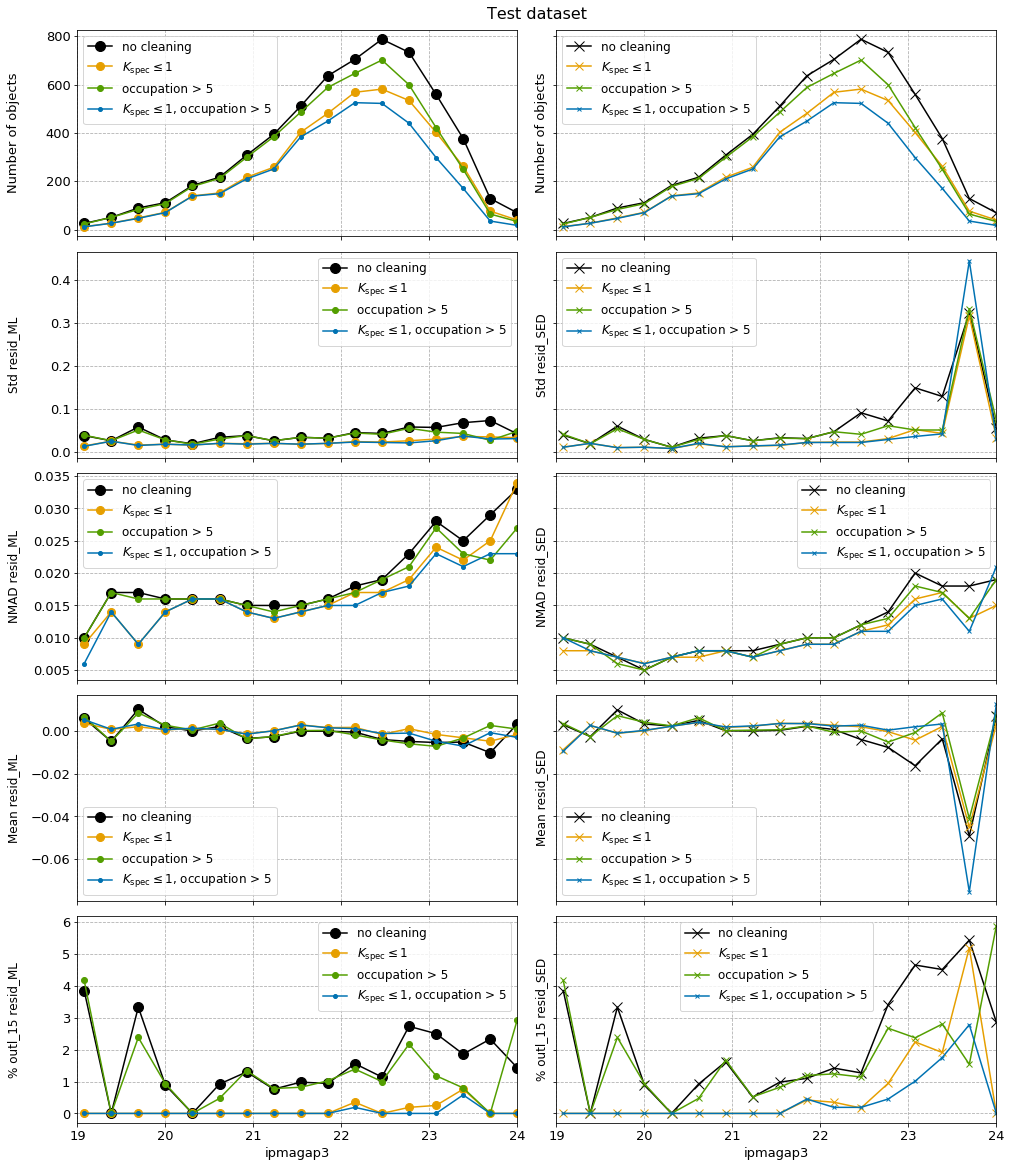

In [215]:
keyStat='Test'
stats=statAll[keyStat]
(r'$K_\mathrm{spec}$'+'\n'+ datasetNamesPlot[0]+' dataset')
estimators=['Std','NMAD','Mean','% outl_15']
cases=['magBins','magBins_specZ_filt','magBins_activMap','magBins_activMap_specZ']
labels=['no cleaning', r'$K_\mathrm{spec} \leq 1$', 'occupation > 5', r'$K_\mathrm{spec}\leq 1$'+ ', occupation > 5']
binCol='ipmagap3'
fig=plotBinnedStats(stats,estimators,residCols=[residML,residSED],cases=cases,binCol=binCol,xlim=(19,24),labels=labels)
fig.suptitle(keyStat+' dataset', fontsize=16, y=1.01, x=0.525)

Text(0.525, 1.01, 'Deimos dataset')

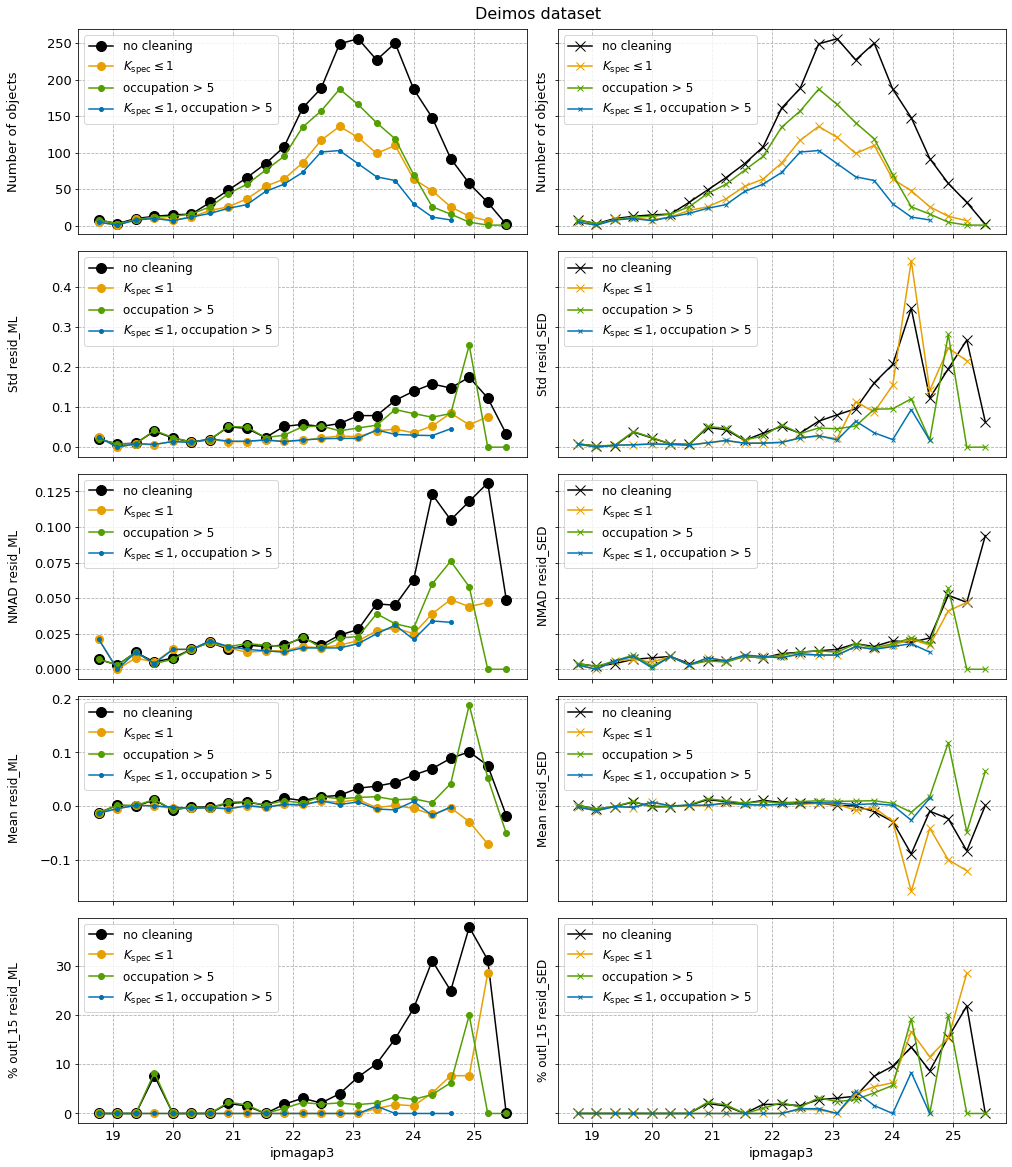

In [216]:
keyStat='Deimos'
stats=statAll[keyStat]

estimators=['Std','NMAD','Mean','% outl_15']
cases=['magBins','magBins_specZ_filt','magBins_activMap','magBins_activMap_specZ']
binCol='ipmagap3'
fig=plotBinnedStats(stats,estimators,residCols=[residML,residSED],cases=cases,binCol=binCol,labels=labels)
fig.suptitle(keyStat+' dataset', fontsize=16, y=1.01, x=0.525)

Text(0.56, 1.01, 'Run dataset')

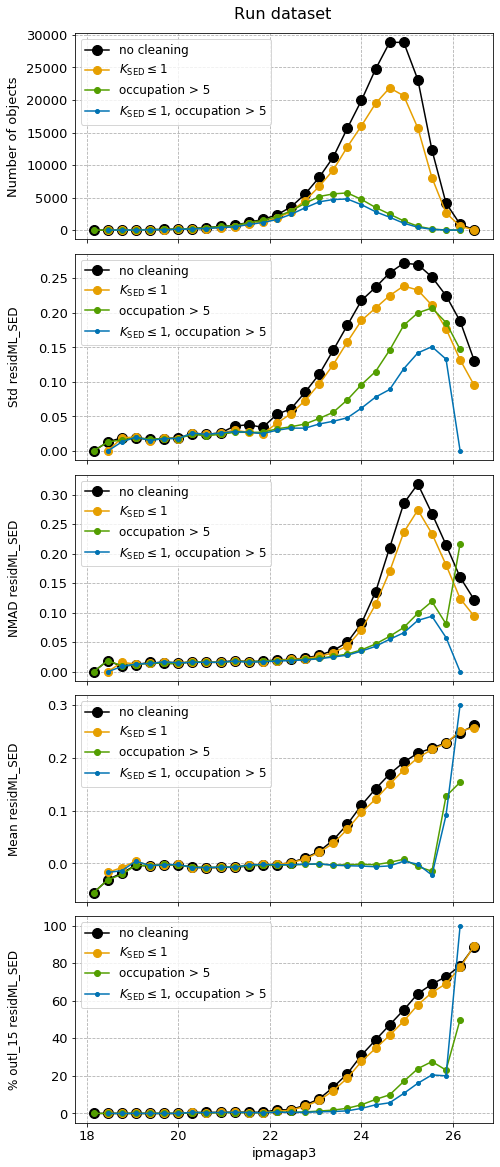

In [217]:
keyStat='Run'
stats=statAll[keyStat]

estimators=['Std','NMAD','Mean','% outl_15']
cases=['magBins','magBins_photoZ_SED_filt','magBins_activMap','magBins_activMap_photoZ_SED']
labels=['no cleaning', r'$K_\mathrm{SED} \leq 1$', 'occupation > 5', r'$K_\mathrm{SED} \leq 1$'+ ', occupation > 5']
binCol='ipmagap3'
fig=plotBinnedStats(stats,estimators,residCols=[residML_SED],cases=cases,binCol=binCol,labels=labels)
fig.suptitle(keyStat+' dataset', fontsize=16, y=1.01,x=0.56)

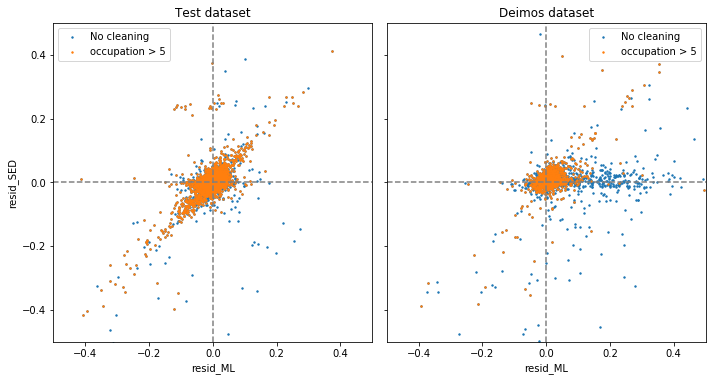

In [218]:
fig,axs=plt.subplots(1,2,figsize=(10,7),sharey=True)
names=['Test','Deimos']
for ax,name in zip(axs,names):
    ax.axvline(x=0,color='gray',linestyle='--')
    ax.axhline(y=0,color='gray',linestyle='--')
    data=datasets[name]
    ax.scatter(data['resid_ML'],data['resid_SED'],s=2,label='No cleaning')
    data=data[data['trainMapOccupation']>5]
    ax.scatter(data['resid_ML'],data['resid_SED'],s=2,label='occupation > 5')
    ax.set_xlim(-0.5,0.5)
    ax.set_ylim(-0.5,0.5)
    ax.set_xlabel('resid_ML')
    ax.set_aspect(1)
    ax.set_title(name+' dataset')
    ax.legend()
axs[0].set_ylabel('resid_SED')
plt.tight_layout()

### How spec-z distribution changes with filtering

In [137]:
def plotMultiBar(datasets,numBins,labels,alpha,logScale=False,normCounts=False,saveFlag=False,
                  range=None, saveName='',xlabel='',ylabel='',axs=None,grayscale=False,legendTextSize=None):
    if axs is None:
        axs = plt.gca()
        
    colorBlindPalette=['#000000','#E69F00','#56B4E9','#009E73','#F0E442','#0072B2','#D55E00','#CC79A7']
    grayScalePalette=['#4c4c4c','#cccccc','#999999','#101010','#dedede']
    if grayscale==True:
        palette=grayScalePalette
    else:
        palette=colorBlindPalette 
    textSize=14
    if logScale==True:
        axs.set_yscale('log')
    if normCounts==True:
        weights=[]
        for data in datasets:
            weight = np.ones_like(data)/float(len(data))
            weights.append(weight)
        n, bins, patches = axs.hist(datasets, bins=numBins,weights=weights,color=palette[:len(datasets)],
                 alpha=alpha, label=labels,edgecolor='black', linewidth=1.2, range=range)
    else:
        n, bins, patches = axs.hist(datasets,bins=numBins,color=palette[:len(datasets)],
                 alpha=alpha,label=labels,edgecolor='black', linewidth=1.2, range=range)  
    if grayscale==True:
        hatches = ['..', 'xx', '**','','|||']
        for patch_set, hatch in zip(patches, hatches):
            plt.setp(patch_set, hatch=hatch)
    axs.set_xlabel(xlabel,size=textSize)
    axs.set_ylabel(ylabel,size=textSize)
    if legendTextSize:
        axs.legend(prop={'size': legendTextSize})
    else:
        axs.legend()

    if saveFlag==True:
        if saveName=="":
            print("Cannot save catalog: saveName is empty string")
        else:
            plt.savefig(saveName)
    return

In [153]:
data=datasets['Test']
d=data[data['specZ_outlCoeff'].abs()<=1]
d=d[d['trainMapOccupation']>5]

Text(0.5, 1.03, 'Test dataset')

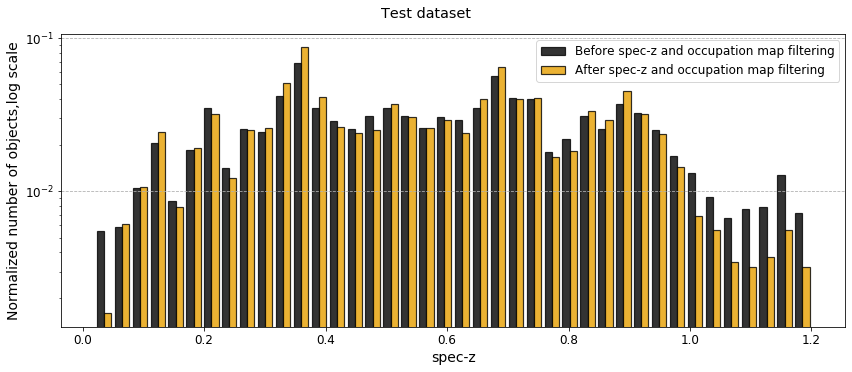

In [154]:
datasetsWork=[data['specZ'],d['specZ']]
labels=['Before spec-z and occupation map filtering','After spec-z and occupation map filtering']
numBins=40
plt.rcParams.update({'font.size': 12})
fig, axs1 = plt.subplots(1, 1,figsize=(12,5))
axs1.grid(axis='y',linestyle ='--')
#axs2.grid(axis='y',linestyle ='--')
plotMultiBar(datasetsWork,numBins,labels,logScale=True,alpha=0.8,normCounts=True,
              xlabel='spec-z',ylabel='Normalized number of objects,log scale',axs=axs1,grayscale=False)
#plotMultiBar(datasetsWork,numBins,labels,logScale=False,alpha=0.8,normCounts=False,
#              xlabel='spectr-z',ylabel='Number of objects',axs=axs2,grayscale=False)
plt.tight_layout()
fig.suptitle('Test dataset',y=1.03)

In [155]:
data=datasets['Deimos']
d=data[data['specZ_outlCoeff'].abs()<=1]
d=d[d['trainMapOccupation']>5]

Text(0.5, 1.03, 'DEIMOS dataset')

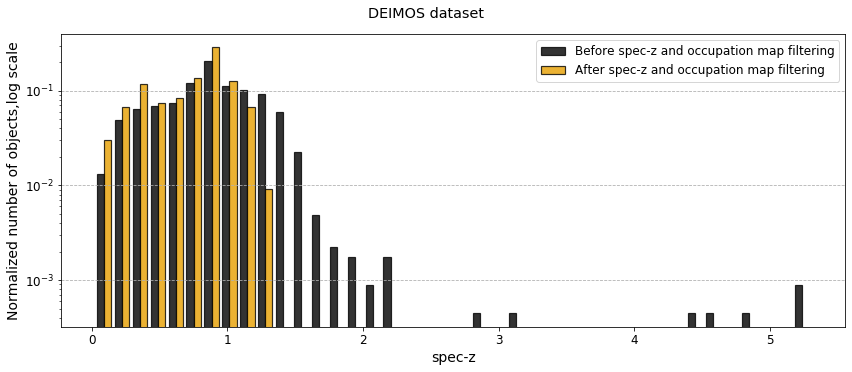

In [156]:
datasetsWork=[data['specZ'],d['specZ']]
labels=['Before spec-z and occupation map filtering','After spec-z and occupation map filtering']
numBins=40
plt.rcParams.update({'font.size': 12})
fig, axs1 = plt.subplots(1, 1,figsize=(12,5))
axs1.grid(axis='y',linestyle ='--')
#axs2.grid(axis='y',linestyle ='--')
plotMultiBar(datasetsWork,numBins,labels,logScale=True,alpha=0.8,normCounts=True,
              xlabel='spec-z',ylabel='Normalized number of objects,log scale',axs=axs1,grayscale=False)
#plotMultiBar(datasetsWork,numBins,labels,logScale=False,alpha=0.8,normCounts=False,
#              xlabel='spectr-z',ylabel='Number of objects',axs=axs2,grayscale=False)
plt.tight_layout()
fig.suptitle('DEIMOS dataset',y=1.03)

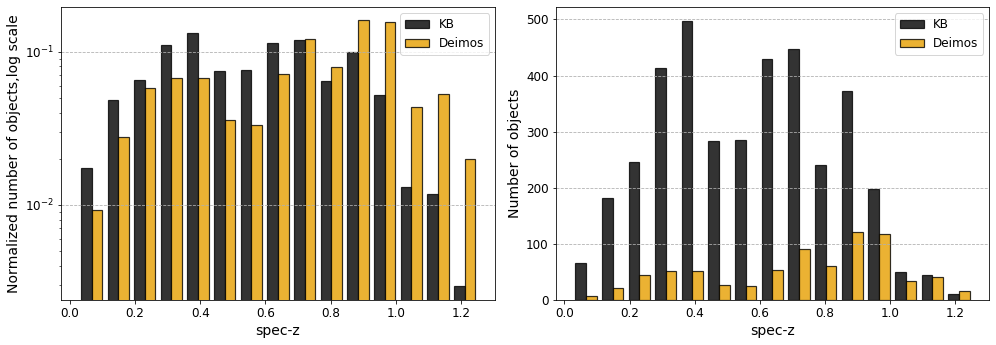

In [163]:
data=datasets['Test']
dTest=data[data['specZ_outlCoeff'].abs()<=1]
dTest=dTest[dTest['trainMapOccupation']>5]

data=datasets['Deimos']
dDeimos=data[data['specZ_outlCoeff'].abs()<=1]
dDeimos=dDeimos[dDeimos['trainMapOccupation']>5]

datasetsWork=[dTest['specZ'],dDeimos['specZ']]
labels=['KB','Deimos']
numBins=15
fig, (axs1,axs2) = plt.subplots(1, 2,figsize=(14,5))
axs1.grid(axis='y',linestyle ='--')
axs2.grid(axis='y',linestyle ='--')
plotMultiBar(datasetsWork,numBins,labels,logScale=True,alpha=0.8,normCounts=True,
              xlabel='spec-z',ylabel='Normalized number of objects,log scale',axs=axs1,grayscale=False)
plotMultiBar(datasetsWork,numBins,labels,logScale=False,alpha=0.8,normCounts=False,
              xlabel='spec-z',ylabel='Number of objects',axs=axs2,grayscale=False)
plt.tight_layout()

### Comparing spec-z distribution of the default and 'dirty SOM-cleaned' datasets

In [144]:
testDirty=pd.read_csv(join(r'D:\Sources\COSMOS_photoZ\COSMOS_v3.0\experimentsArticle\DirtySample\exp027',
                                  'METAPHOR_testout_05_COSMOS_SpectrZ_Zlim_1p2_specZOutlCoeff_filter.csv'))

In [165]:
data=datasets['Test']
d=data[data['specZ_outlCoeff'].abs()<=1]
d=d[d['trainMapOccupation']>5]

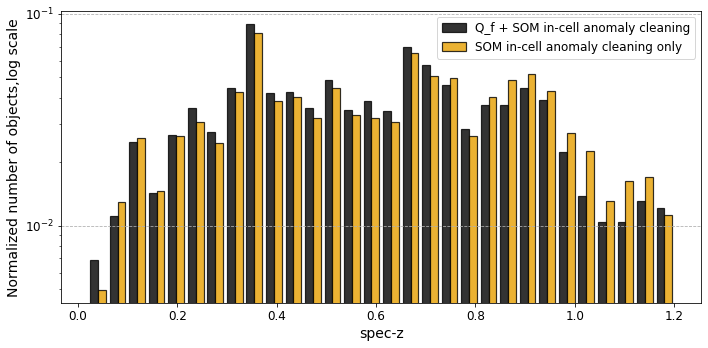

In [169]:
datasetsWork=[data['specZ'],testDirty['z_spec']]
labels=['Q_f + SOM in-cell anomaly cleaning','SOM in-cell anomaly cleaning only']
numBins=30
plt.rcParams.update({'font.size': 12})
fig, axs1 = plt.subplots(1, 1,figsize=(10,5))
axs1.grid(axis='y',linestyle ='--')
#axs2.grid(axis='y',linestyle ='--')
plotMultiBar(datasetsWork,numBins,labels,logScale=True,alpha=0.8,normCounts=True,
              xlabel='spec-z',ylabel='Normalized number of objects,log scale',axs=axs1,grayscale=False)
#plotMultiBar(datasetsWork,numBins,labels,logScale=False,alpha=0.8,normCounts=False,
#              xlabel='spec-z',ylabel='Number of objects',axs=axs2,grayscale=False)
plt.tight_layout()
#fig.suptitle('',y=1.03)